In [1]:
from training_functions import *
from merging import *
from utils import *
from catboost import CatBoostClassifier


/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_mpdb_plane, cnt_and_name_features_mpdb = get_featurizers_features_mpdb()

X_mpdb = df_mpdb_plane.drop([ 
     'formula_pretty',
     'material_id', 
 ], axis=1)

In [3]:
df_kahle_fin, cnt_and_name_features_kahle = get_featurizers_features_kahle()

X = df_kahle_fin.drop([ 
    'stru_label',
     'stru_id', 
     'group', 
     'structure', 
     'diffusion_mean_cm2_s', 
     'label', 
     'src_id', 
     'diffusion_sem_cm2_s', 
     'n_Li', 
     'sigma_S_cm', 
     'sigma_S_cm_sem', 
     'sigma_S_cm_err'
 ], axis=1)


feature_names = X.columns.tolist()


In [4]:

feature_names = np.array(feature_names)[~np.all(X.to_numpy() == 0, axis=0)]

X = X.to_numpy()
X_mpdb = X_mpdb.to_numpy()

X_mpdb = X_mpdb[:, ~np.all(X == 0, axis=0)]


# X_mpdb = StandardScaler().fit_transform(X_mpdb)
X = X[:, ~np.all(X == 0, axis=0)]

feature_weights = [1 / cnt_and_name_features_kahle['_'.join(x.split('_')[1:])] for x in feature_names]

In [5]:
params = {
        "max_depth": 3,
        "learning_rate" : 0.9,
        "iterations": 3,
    }


test_roc_auc, train_roc_auc, roc_like_comparison, preds_kahle, feature_importance, feature_entarances, y, preds_mpdb = evaluate_parameters(params, X, df_kahle_fin, feature_weights, thr_positive = 1e-1, thr_negative = 1e-2, model_name = 'catboost', X_mpdb = X_mpdb)

  0%|          | 0/116 [00:00<?, ?it/s]

  1%|          | 1/116 [00:00<01:31,  1.25it/s]

roc-auc on train for 0 fold with size 118: 0.8583252190847127


100%|██████████| 116/116 [01:23<00:00,  1.40it/s]


test roc-auc mean: 0.6441688731294508, std: 0.06328272509429896
mean train roc-auc: 0.8386139958602608


  1%|          | 1/116 [00:00<01:16,  1.51it/s]

roc-auc on train for 0 fold with size 118: 0.8450178513469654


100%|██████████| 116/116 [01:22<00:00,  1.41it/s]


test roc-auc mean: 0.6615493842656526, std: 0.0630654502914409
mean train roc-auc: 0.8476434564364989


  1%|          | 1/116 [00:00<01:32,  1.24it/s]

roc-auc on train for 0 fold with size 118: 0.8810451152223304


100%|██████████| 116/116 [01:22<00:00,  1.41it/s]


test roc-auc mean: 0.6799023171461123, std: 0.06009998576516126
mean train roc-auc: 0.8488526055757993


  1%|          | 1/116 [00:00<01:28,  1.30it/s]

roc-auc on train for 0 fold with size 118: 0.803959753326842


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.7144312263400675, std: 0.054010975772596385
mean train roc-auc: 0.8438018650143936


  1%|          | 1/116 [00:00<01:20,  1.42it/s]

roc-auc on train for 0 fold with size 118: 0.7938980850373255


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.6391394189282135, std: 0.06648126932651677
mean train roc-auc: 0.844100225181444


  1%|          | 1/116 [00:00<01:23,  1.37it/s]

roc-auc on train for 0 fold with size 118: 0.8192145407335281


100%|██████████| 116/116 [01:23<00:00,  1.40it/s]


test roc-auc mean: 0.7340048849081063, std: 0.05521534672858821
mean train roc-auc: 0.8441332739932884


  1%|          | 1/116 [00:00<01:30,  1.27it/s]

roc-auc on train for 0 fold with size 118: 0.8156442713404739


100%|██████████| 116/116 [01:24<00:00,  1.38it/s]


test roc-auc mean: 0.6970306685465851, std: 0.05570662740154082
mean train roc-auc: 0.8472373394895594


  1%|          | 1/116 [00:00<01:30,  1.27it/s]

roc-auc on train for 0 fold with size 118: 0.8106134371957158


100%|██████████| 116/116 [01:24<00:00,  1.38it/s]


test roc-auc mean: 0.6514290753382654, std: 0.06289369025095091
mean train roc-auc: 0.8528618699933909


  1%|          | 1/116 [00:00<01:23,  1.37it/s]

roc-auc on train for 0 fold with size 118: 0.8555663745537163


100%|██████████| 116/116 [01:24<00:00,  1.38it/s]


test roc-auc mean: 0.7487380214726036, std: 0.05252830723021366
mean train roc-auc: 0.8393055418109118


  1%|          | 1/116 [00:00<01:27,  1.32it/s]

roc-auc on train for 0 fold with size 118: 0.8412852969814996


100%|██████████| 116/116 [01:23<00:00,  1.38it/s]


test roc-auc mean: 0.5721320470363324, std: 0.06842979885328966
mean train roc-auc: 0.8415792847871535


  1%|          | 1/116 [00:00<01:28,  1.30it/s]

roc-auc on train for 0 fold with size 118: 0.8356053229470952


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.6895153366068703, std: 0.05711415873341372
mean train roc-auc: 0.8414401184282687


  1%|          | 1/116 [00:00<01:21,  1.41it/s]

roc-auc on train for 0 fold with size 118: 0.8586497890295359


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.7164308638099615, std: 0.05615402316140672
mean train roc-auc: 0.8387860315529406


  1%|          | 1/116 [00:00<01:25,  1.35it/s]

roc-auc on train for 0 fold with size 118: 0.8662771827328788


100%|██████████| 116/116 [01:22<00:00,  1.41it/s]


test roc-auc mean: 0.6716410492808645, std: 0.062117363795057445
mean train roc-auc: 0.8464753525464308


  1%|          | 1/116 [00:00<01:38,  1.17it/s]

roc-auc on train for 0 fold with size 118: 0.8901330736773775


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.6743312580676996, std: 0.06175972885100546
mean train roc-auc: 0.8414000221116956


  1%|          | 1/116 [00:00<01:18,  1.47it/s]

roc-auc on train for 0 fold with size 118: 0.8476144109055501


100%|██████████| 116/116 [01:22<00:00,  1.41it/s]


test roc-auc mean: 0.6151350734777268, std: 0.061897619556842184
mean train roc-auc: 0.8455968811280248


  1%|          | 1/116 [00:00<01:20,  1.43it/s]

roc-auc on train for 0 fold with size 118: 0.8111002921129503


100%|██████████| 116/116 [01:21<00:00,  1.42it/s]


test roc-auc mean: 0.7003049473238565, std: 0.06416182031556117
mean train roc-auc: 0.8417558930282847


  1%|          | 1/116 [00:00<01:26,  1.33it/s]

roc-auc on train for 0 fold with size 118: 0.867737747484583


100%|██████████| 116/116 [01:22<00:00,  1.41it/s]


test roc-auc mean: 0.6997571212850859, std: 0.057222502620502935
mean train roc-auc: 0.841569132312175


  1%|          | 1/116 [00:00<01:29,  1.28it/s]

roc-auc on train for 0 fold with size 118: 0.8609217786432977


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.6846030458558979, std: 0.06027064188354336
mean train roc-auc: 0.8490147147517628


  1%|          | 1/116 [00:00<01:20,  1.42it/s]

roc-auc on train for 0 fold with size 118: 0.83820188250568


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.6688678893862013, std: 0.05853975516861717
mean train roc-auc: 0.8452684293951395


  1%|          | 1/116 [00:00<01:20,  1.43it/s]

roc-auc on train for 0 fold with size 118: 0.8357676079195067


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.699714984174301, std: 0.05494726922518236
mean train roc-auc: 0.8403699488066015


  1%|          | 1/116 [00:00<01:14,  1.54it/s]

roc-auc on train for 0 fold with size 118: 0.8583252190847127


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.7362328665639791, std: 0.05582480037773209
mean train roc-auc: 0.8419683172646175


  1%|          | 1/116 [00:00<01:29,  1.29it/s]

roc-auc on train for 0 fold with size 118: 0.8385264524505032


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.7117443099334708, std: 0.05830958393173572
mean train roc-auc: 0.84664965012273


  1%|          | 1/116 [00:00<01:28,  1.30it/s]

roc-auc on train for 0 fold with size 118: 0.8059071729957806


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.6741810774657568, std: 0.06097504489734616
mean train roc-auc: 0.8397434038227389


  1%|          | 1/116 [00:00<01:21,  1.42it/s]

roc-auc on train for 0 fold with size 118: 0.8583252190847128


100%|██████████| 116/116 [01:24<00:00,  1.38it/s]


test roc-auc mean: 0.6600046850714145, std: 0.06287179252150048
mean train roc-auc: 0.8434752816940194


  1%|          | 1/116 [00:00<01:20,  1.43it/s]

roc-auc on train for 0 fold with size 118: 0.83820188250568


100%|██████████| 116/116 [01:22<00:00,  1.41it/s]


test roc-auc mean: 0.6815752878965418, std: 0.058558626524734016
mean train roc-auc: 0.848034118482609


  1%|          | 1/116 [00:00<01:19,  1.45it/s]

roc-auc on train for 0 fold with size 118: 0.8755274261603375


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.726838513895595, std: 0.055698540765595196
mean train roc-auc: 0.8422817881028033


  1%|          | 1/116 [00:00<01:19,  1.44it/s]

roc-auc on train for 0 fold with size 118: 0.8743914313534566


100%|██████████| 116/116 [01:22<00:00,  1.41it/s]


test roc-auc mean: 0.6056141474979869, std: 0.061491233976168805
mean train roc-auc: 0.8435830407749093


  1%|          | 1/116 [00:00<01:17,  1.49it/s]

roc-auc on train for 0 fold with size 118: 0.8419344368711458


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.6196151178470604, std: 0.06601065085512633
mean train roc-auc: 0.842676351265381


  1%|          | 1/116 [00:00<01:51,  1.03it/s]

roc-auc on train for 0 fold with size 118: 0.8257059396299903


100%|██████████| 116/116 [01:26<00:00,  1.34it/s]


test roc-auc mean: 0.7076502541765517, std: 0.06398953120561775
mean train roc-auc: 0.837904415126874


  1%|          | 1/116 [00:00<01:26,  1.33it/s]

roc-auc on train for 0 fold with size 118: 0.8360921778643298


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.6034104548846212, std: 0.06458946911310733
mean train roc-auc: 0.8393939858323157


  1%|          | 1/116 [00:00<01:18,  1.46it/s]

roc-auc on train for 0 fold with size 118: 0.8171048360921778


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.6855341395534015, std: 0.06167652707594296
mean train roc-auc: 0.8407128232114341


  1%|          | 1/116 [00:00<01:26,  1.33it/s]

roc-auc on train for 0 fold with size 118: 0.8836416747809153


100%|██████████| 116/116 [01:24<00:00,  1.37it/s]


test roc-auc mean: 0.6968806637538023, std: 0.05928864350195694
mean train roc-auc: 0.8472855155397433


  1%|          | 1/116 [00:00<01:21,  1.42it/s]

roc-auc on train for 0 fold with size 118: 0.8296007789678675


100%|██████████| 116/116 [01:23<00:00,  1.40it/s]


test roc-auc mean: 0.6871162833605435, std: 0.06308232995261666
mean train roc-auc: 0.835899136336901


  1%|          | 1/116 [00:00<01:22,  1.39it/s]

roc-auc on train for 0 fold with size 118: 0.8508601103537813


100%|██████████| 116/116 [01:24<00:00,  1.38it/s]


test roc-auc mean: 0.6520374940159411, std: 0.064407285865084
mean train roc-auc: 0.8410150762113499


  1%|          | 1/116 [00:00<01:19,  1.44it/s]

roc-auc on train for 0 fold with size 118: 0.8532943849399546


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.7385535278749473, std: 0.05210895546772478
mean train roc-auc: 0.8417164313276855


  1%|          | 1/116 [00:00<01:18,  1.46it/s]

roc-auc on train for 0 fold with size 118: 0.8393378773125608


100%|██████████| 116/116 [01:23<00:00,  1.38it/s]


test roc-auc mean: 0.6513934048416815, std: 0.062332728665840643
mean train roc-auc: 0.8419790992933682


  1%|          | 1/116 [00:00<01:40,  1.14it/s]

roc-auc on train for 0 fold with size 118: 0.825056799740344


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.7073987898900673, std: 0.056556914431992476
mean train roc-auc: 0.8355176023602892


  1%|          | 1/116 [00:00<01:25,  1.35it/s]

roc-auc on train for 0 fold with size 118: 0.8414475819539111


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.699009035347968, std: 0.05602339029866935
mean train roc-auc: 0.8395386032616922


  1%|          | 1/116 [00:00<01:17,  1.48it/s]

roc-auc on train for 0 fold with size 118: 0.8416098669263226


100%|██████████| 116/116 [01:23<00:00,  1.40it/s]


test roc-auc mean: 0.7121773615885238, std: 0.059520646068177044
mean train roc-auc: 0.8479186248182026


  1%|          | 1/116 [00:00<01:18,  1.46it/s]

roc-auc on train for 0 fold with size 118: 0.8620577734501785


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.6397140667781918, std: 0.07021806103869042
mean train roc-auc: 0.8431692306624644


In [6]:
np.savetxt('predictions/catboost_only_featurizers_max_depth_3_lr_0.5_n_estimators_3__new_scaled.txt', preds_mpdb)

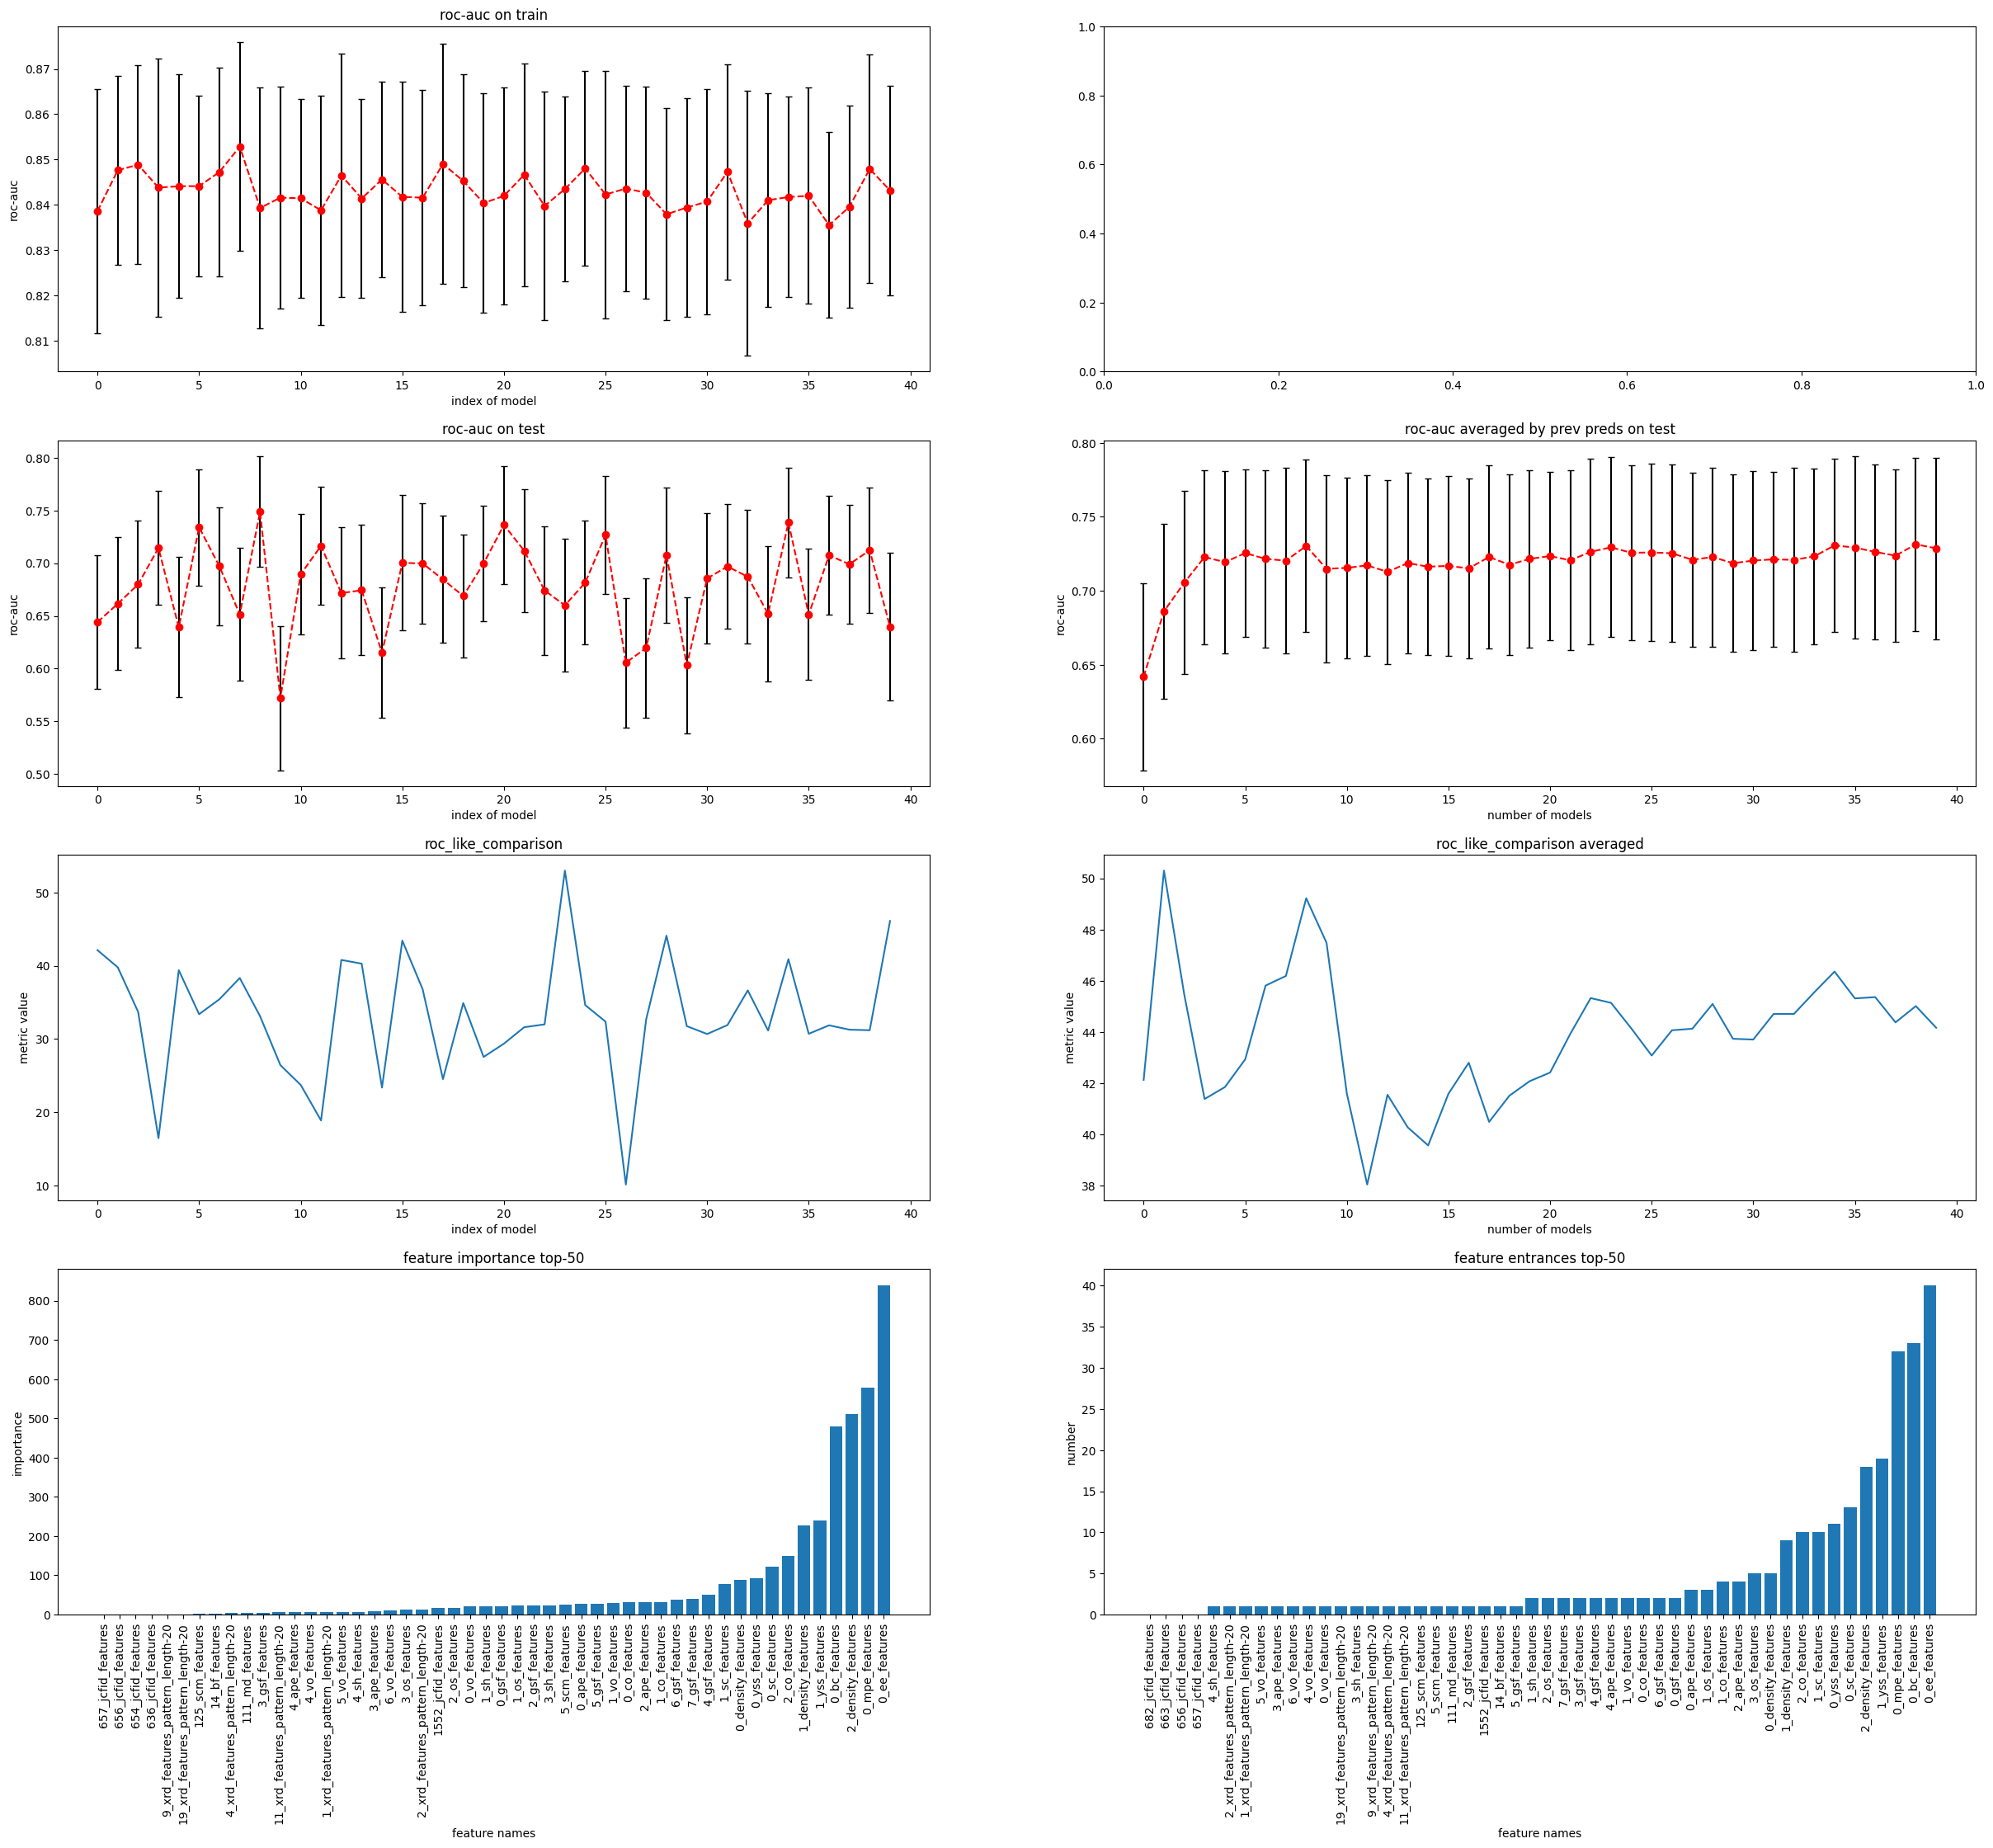

In [7]:
roc_like_comparison_averaged, roc_auc_averaged = plot_statistics(df_kahle_fin, feature_names, feature_entarances, feature_importance, train_roc_auc, test_roc_auc, roc_like_comparison, preds_kahle, y)

In [9]:
results = pd.DataFrame({
              'mean train roc-auc averaged by 40 models': [np.array(train_roc_auc)[:, 0].mean()],
              'roc_auc on test by aggregated preds': [roc_auc_averaged[-1][0]],
              'mean test roc-auc averaged by 40 models': [np.array(test_roc_auc)[:, 0].mean()],
              'roc_like_comparison by aggregated preds': [roc_like_comparison_averaged[-1]],
              'roc_like_comparison averaged by 40 models': [roc_like_comparison[-1]]}).T
    
results = results.reset_index()
results.columns = ['statistic', 'result']

results

,statistic,result
0,mean train roc-auc averaged by 40 models,0.843007
1,roc_auc on test by aggregated preds,0.728615
2,mean test roc-auc averaged by 40 models,0.678988
3,roc_like_comparison by aggregated preds,44.164070
4,roc_like_comparison averaged by 40 models,46.113483


In [10]:
params = {
        "max_depth": 3,
        "learning_rate" : 0.9,
        "iterations": 3,
    }


test_roc_auc, train_roc_auc, roc_like_comparison, preds_kahle, feature_importance, feature_entarances, y, preds_mpdb = evaluate_parameters(params, X, df_kahle_fin, feature_weights, thr_positive = 1e-1, thr_negative = 1e-2, model_name = 'catboost', X_mpdb = X_mpdb)

  1%|          | 1/116 [00:00<01:33,  1.23it/s]

roc-auc on train for 0 fold with size 118: 0.8810451152223304


100%|██████████| 116/116 [02:00<00:00,  1.04s/it]


test roc-auc mean: 0.6773842877057697, std: 0.0609463924582601
mean train roc-auc: 0.8488526055757993


  1%|          | 1/116 [00:00<01:49,  1.05it/s]

roc-auc on train for 0 fold with size 118: 0.8409607270366765


100%|██████████| 116/116 [01:25<00:00,  1.35it/s]


test roc-auc mean: 0.7097944200275553, std: 0.053905754303377684
mean train roc-auc: 0.8391676110893651


  1%|          | 1/116 [00:00<01:32,  1.24it/s]

roc-auc on train for 0 fold with size 118: 0.8330087633885103


100%|██████████| 116/116 [01:24<00:00,  1.37it/s]


test roc-auc mean: 0.6577955017585432, std: 0.06612450379886306
mean train roc-auc: 0.8386528809301019


  1%|          | 1/116 [00:00<01:19,  1.45it/s]

roc-auc on train for 0 fold with size 118: 0.7594936708860759


100%|██████████| 116/116 [01:24<00:00,  1.37it/s]


test roc-auc mean: 0.6472109579351972, std: 0.06742697477481158
mean train roc-auc: 0.8386124307196323


  1%|          | 1/116 [00:00<01:31,  1.26it/s]

roc-auc on train for 0 fold with size 118: 0.8258682246024018


100%|██████████| 116/116 [01:29<00:00,  1.30it/s]


test roc-auc mean: 0.6851570447324427, std: 0.05780976527215342
mean train roc-auc: 0.8464973114556402


  1%|          | 1/116 [00:00<01:23,  1.38it/s]

roc-auc on train for 0 fold with size 118: 0.8469652710159039


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.7051955753649652, std: 0.05240386725485248
mean train roc-auc: 0.8435426991716694


  1%|          | 1/116 [00:00<01:21,  1.41it/s]

roc-auc on train for 0 fold with size 118: 0.8211619604024667


100%|██████████| 116/116 [01:23<00:00,  1.38it/s]


test roc-auc mean: 0.763624361356891, std: 0.04766995757365405
mean train roc-auc: 0.8457041427325784


  1%|          | 1/116 [00:00<01:21,  1.40it/s]

roc-auc on train for 0 fold with size 118: 0.8847776695877961


100%|██████████| 116/116 [01:23<00:00,  1.38it/s]


test roc-auc mean: 0.7701618802605483, std: 0.05366896508365696
mean train roc-auc: 0.8443852524304456


  1%|          | 1/116 [00:00<01:27,  1.31it/s]

roc-auc on train for 0 fold with size 118: 0.8310613437195715


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.6541134983252912, std: 0.06856806895774617
mean train roc-auc: 0.8431613110784972


  1%|          | 1/116 [00:00<01:27,  1.31it/s]

roc-auc on train for 0 fold with size 118: 0.8276533592989289


100%|██████████| 116/116 [01:24<00:00,  1.38it/s]


test roc-auc mean: 0.6829644522720895, std: 0.05690810021596682
mean train roc-auc: 0.8403294599393213


  1%|          | 1/116 [00:00<01:17,  1.48it/s]

roc-auc on train for 0 fold with size 118: 0.7784810126582279


100%|██████████| 116/116 [01:22<00:00,  1.40it/s]


test roc-auc mean: 0.6660824740973348, std: 0.06388747710977385
mean train roc-auc: 0.8414523054480038


  1%|          | 1/116 [00:00<01:24,  1.36it/s]

roc-auc on train for 0 fold with size 118: 0.8505355404089581


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.6968054224503791, std: 0.05675865530653325
mean train roc-auc: 0.8524977389447411


  1%|          | 1/116 [00:00<01:24,  1.37it/s]

roc-auc on train for 0 fold with size 118: 0.7964946445959104


100%|██████████| 116/116 [01:23<00:00,  1.40it/s]


test roc-auc mean: 0.6417011569584216, std: 0.06059650028198356
mean train roc-auc: 0.8407580144036012


  1%|          | 1/116 [00:00<01:22,  1.40it/s]

roc-auc on train for 0 fold with size 118: 0.839662447257384


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.7435693754210161, std: 0.054510411139308254
mean train roc-auc: 0.8415666822067046


  1%|          | 1/116 [00:00<01:34,  1.22it/s]

roc-auc on train for 0 fold with size 118: 0.8763388510223953


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.637431320966277, std: 0.06223256363117454
mean train roc-auc: 0.8477135895550918


  1%|          | 1/116 [00:00<01:29,  1.29it/s]

roc-auc on train for 0 fold with size 118: 0.8610840636157091


100%|██████████| 116/116 [01:24<00:00,  1.38it/s]


test roc-auc mean: 0.6410294236094348, std: 0.06460999517101192
mean train roc-auc: 0.84617311749432


  1%|          | 1/116 [00:00<01:28,  1.29it/s]

roc-auc on train for 0 fold with size 118: 0.8156442713404739


100%|██████████| 116/116 [01:23<00:00,  1.38it/s]


test roc-auc mean: 0.6943680688957304, std: 0.05643479280674613
mean train roc-auc: 0.8472373394895594


  1%|          | 1/116 [00:00<01:35,  1.20it/s]

roc-auc on train for 0 fold with size 118: 0.8687114573190523


100%|██████████| 116/116 [01:23<00:00,  1.39it/s]


test roc-auc mean: 0.6299661159581171, std: 0.06865175115909604
mean train roc-auc: 0.8482828469864772


  1%|          | 1/116 [00:00<01:32,  1.24it/s]

roc-auc on train for 0 fold with size 118: 0.8248945147679325


100%|██████████| 116/116 [01:25<00:00,  1.36it/s]


test roc-auc mean: 0.6820358011714392, std: 0.05561385126303224
mean train roc-auc: 0.8514539190016852


  1%|          | 1/116 [00:00<01:24,  1.36it/s]

roc-auc on train for 0 fold with size 118: 0.8760142810775722


100%|██████████| 116/116 [01:25<00:00,  1.35it/s]


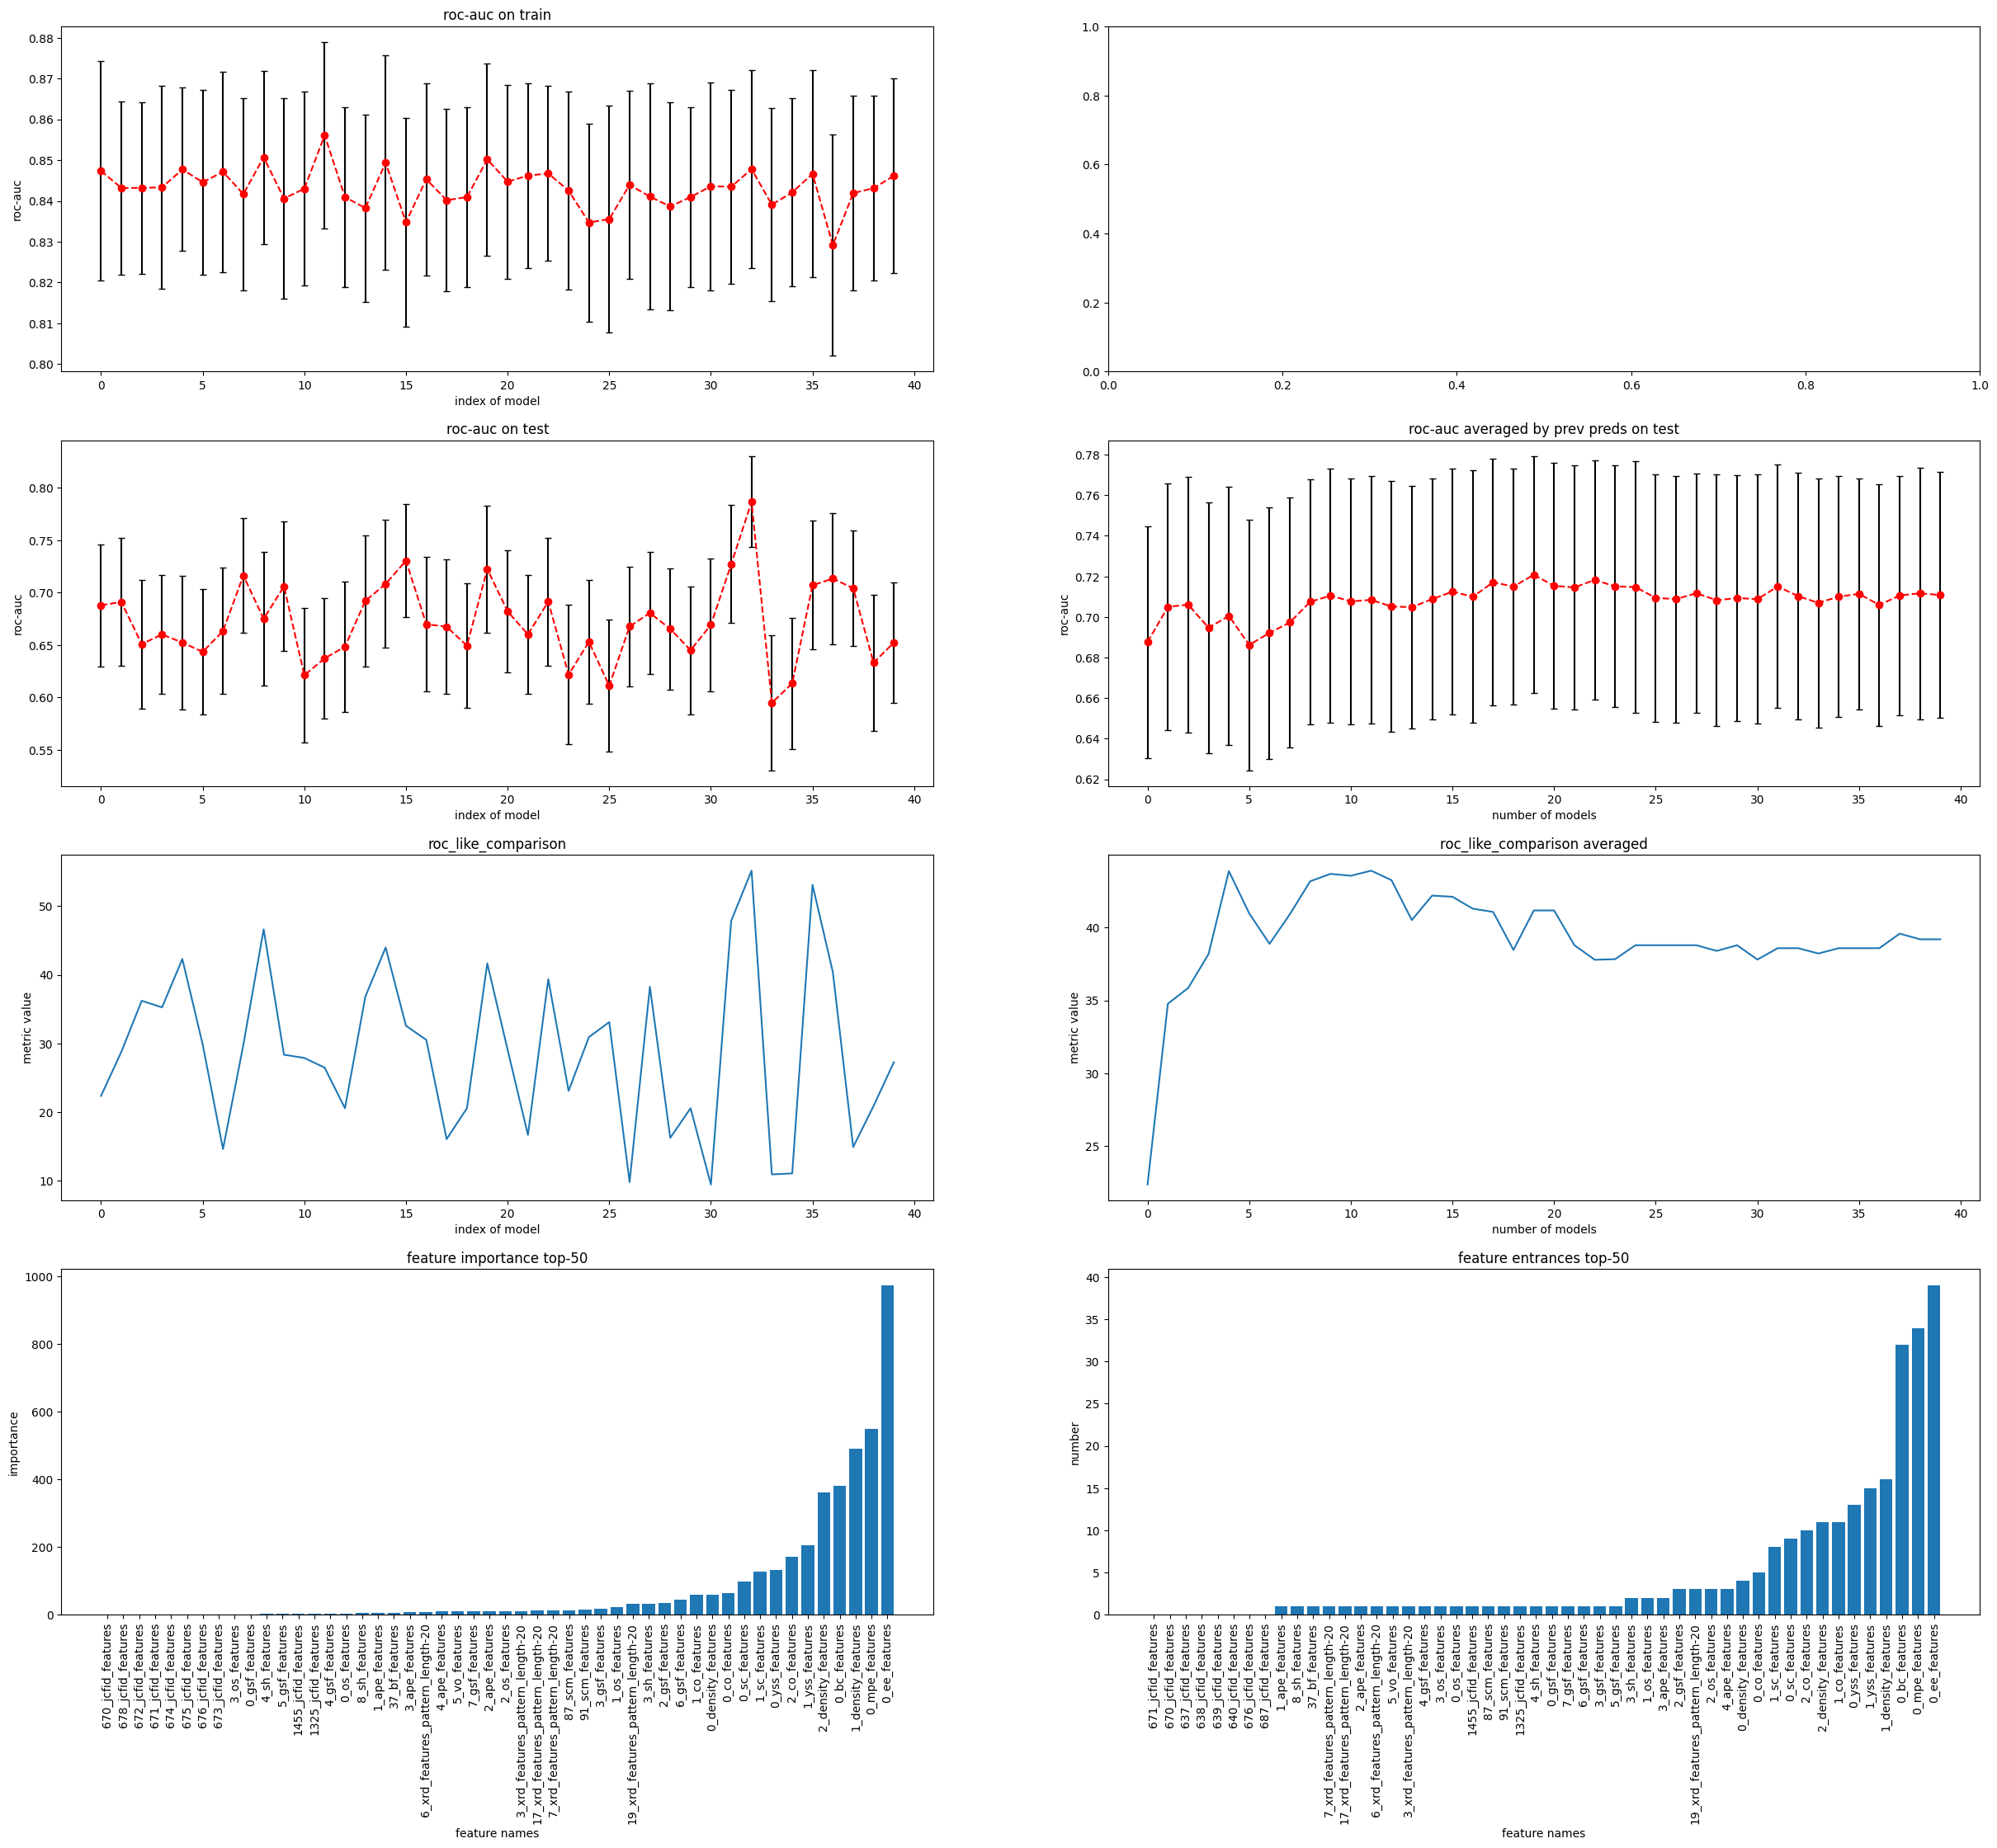

In [32]:
roc_like_comparison_averaged, roc_auc_averaged = plot_statistics(df_kahle_fin, feature_names, feature_entarances, feature_importance, train_roc_auc, test_roc_auc, roc_like_comparison, preds_kahle, y)

In [63]:
results = pd.DataFrame({
              'mean train roc-auc averaged by 40 models': [np.array(train_roc_auc)[:, 0].mean()],
              'roc_auc on test by aggregated preds': [roc_auc_averaged[-1][0]],
              'mean test roc-auc averaged by 40 models': [np.array(test_roc_auc)[:, 0].mean()],
              'roc_like_comparison by aggregated preds': [roc_like_comparison_averaged[-1]],
              'roc_like_comparison averaged by 40 models': [roc_like_comparison[-1]]}).T
    
results = results.reset_index()
results.columns = ['statistic', 'result']

results

,statistic,result
0,mean train roc-auc averaged by 40 models,0.843154
1,roc_auc on test by aggregated preds,0.710826
2,mean test roc-auc averaged by 40 models,0.671777
3,roc_like_comparison by aggregated preds,39.198593
4,roc_like_comparison averaged by 40 models,27.248785


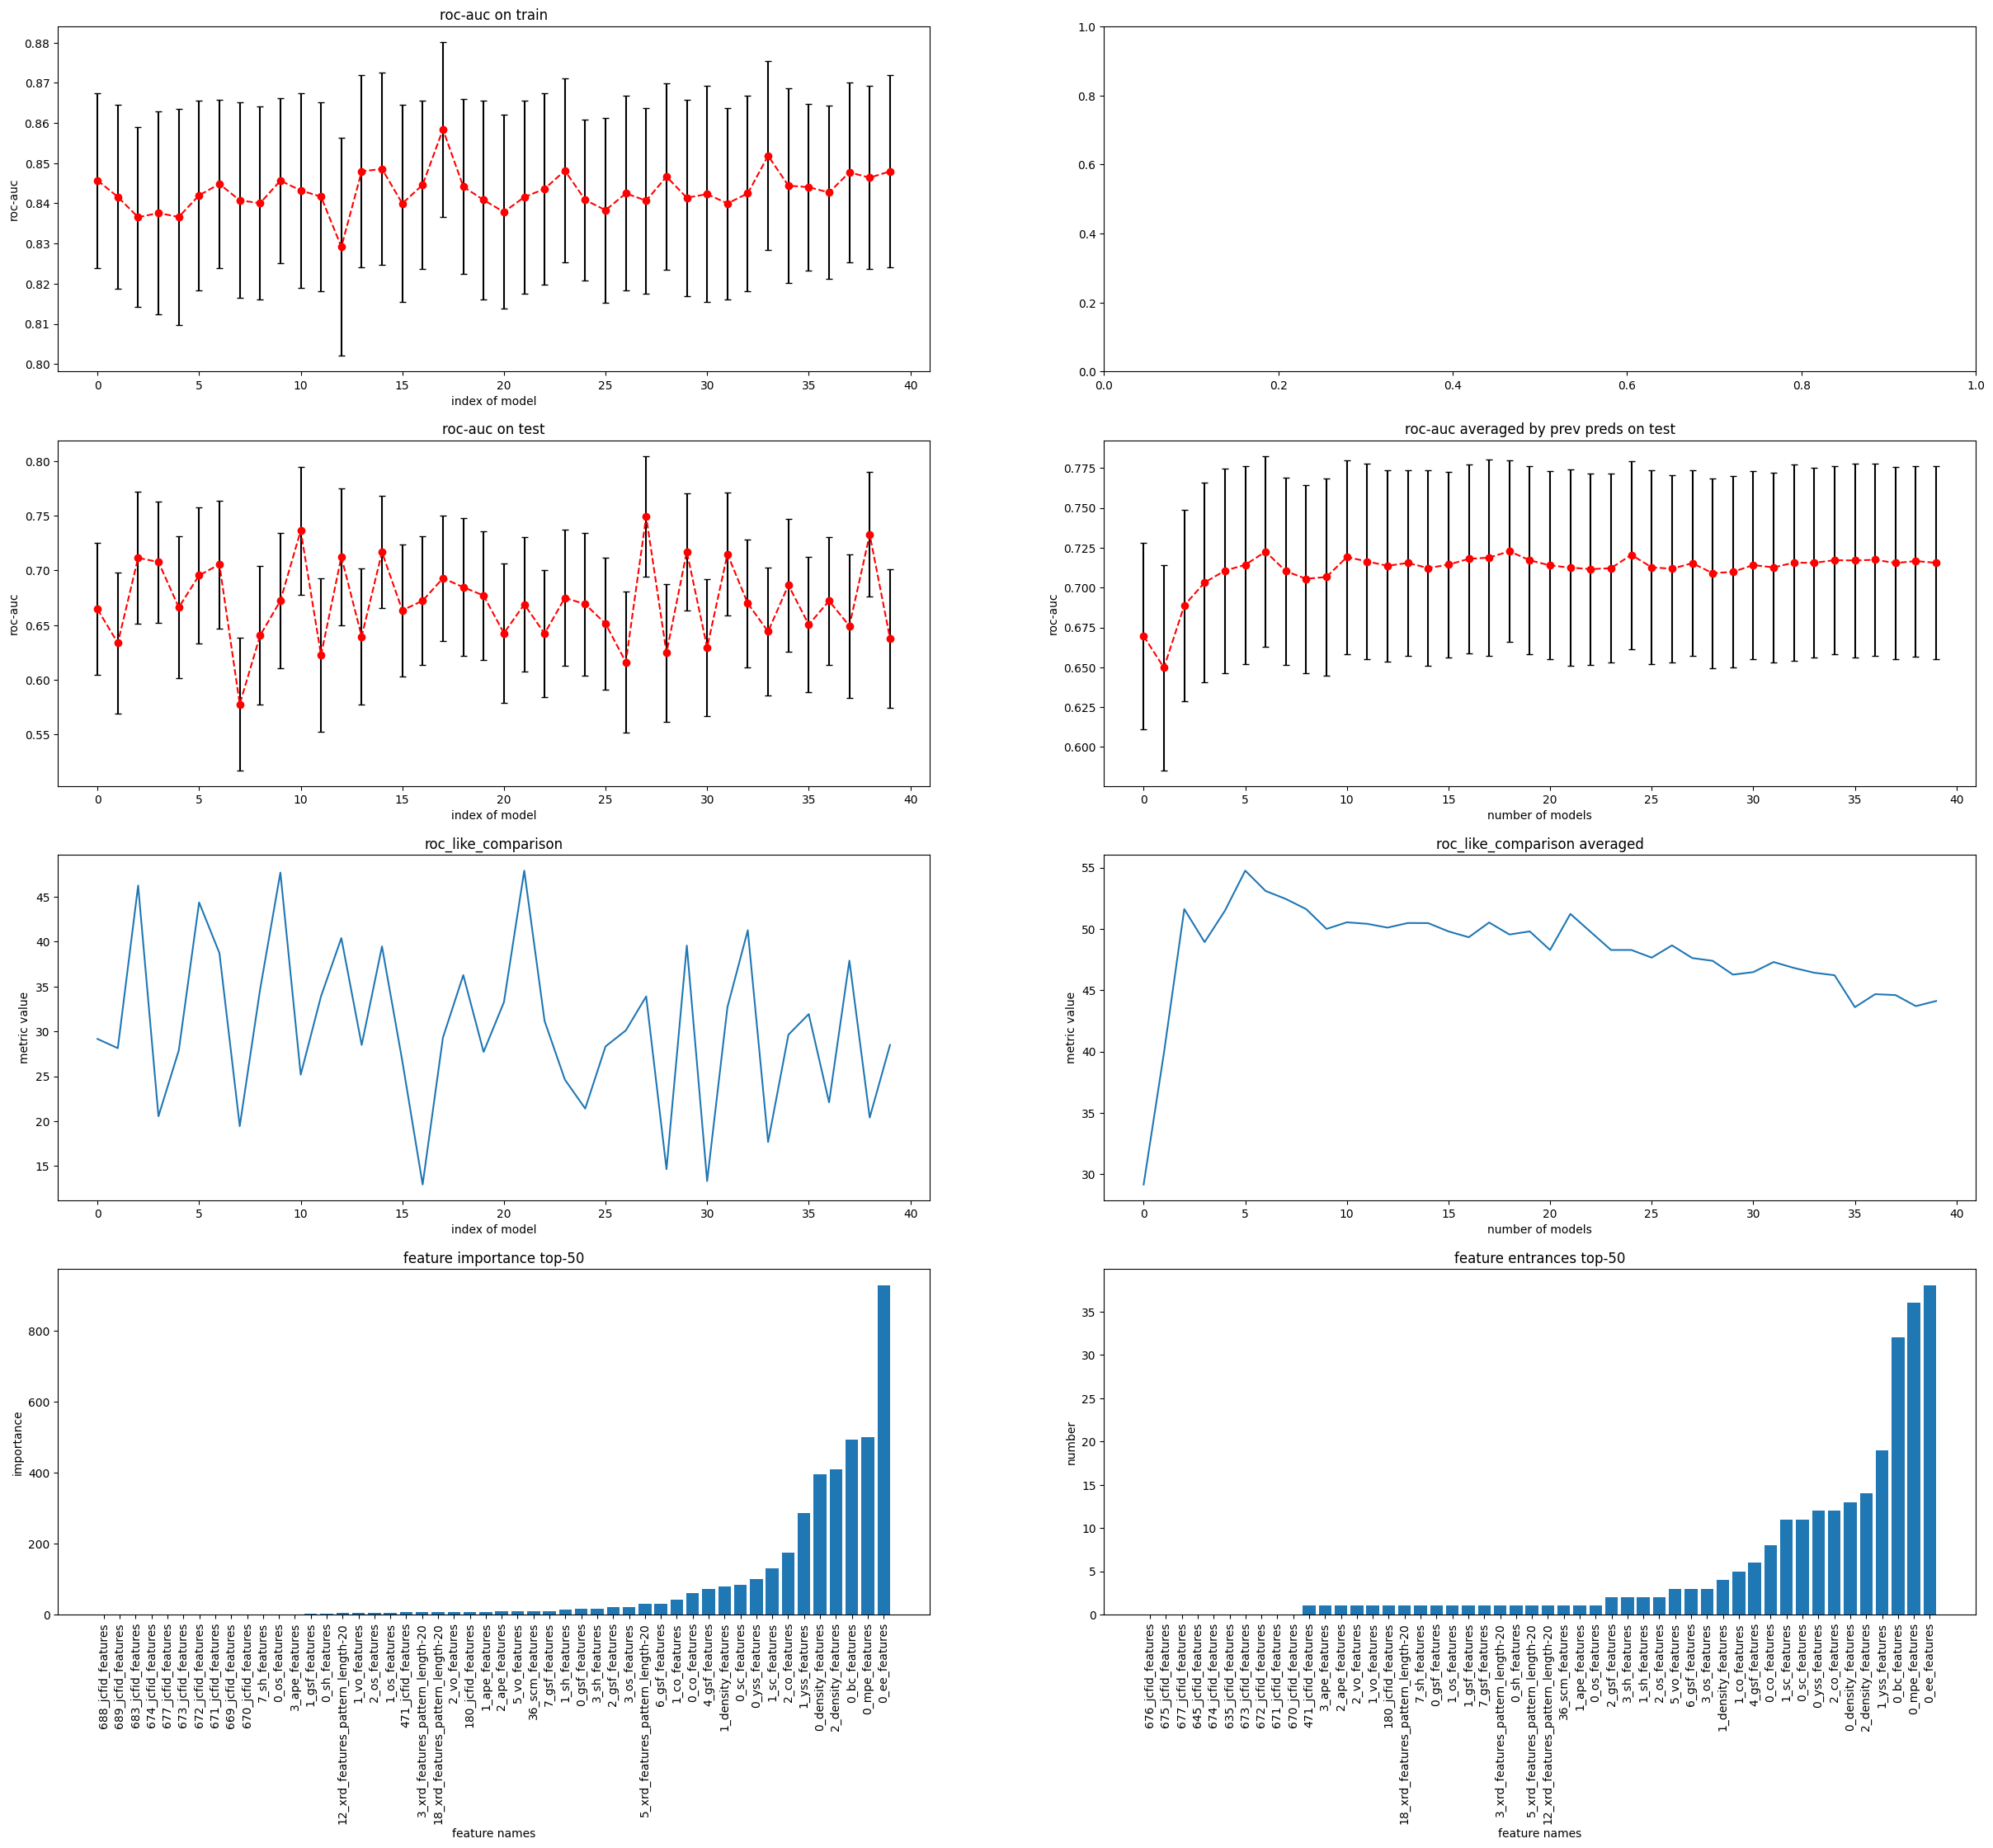

In [13]:
roc_like_comparison_averaged, roc_auc_averaged = plot_statistics(df_kahle_fin, feature_names, feature_entarances, feature_importance, train_roc_auc, test_roc_auc, roc_like_comparison, preds_kahle, y)

In [14]:
print(f'roc_like_comparison: {roc_like_comparison_averaged[-1]}, roc_auc on test {roc_auc_averaged[-1][0]}, mean train roc-auc {np.array(train_roc_auc)[:, 0].mean()}')

roc_like_comparison: 44.11860301883945, roc_auc on test 0.7154973709902807, mean train roc-auc 0.8430215475294138


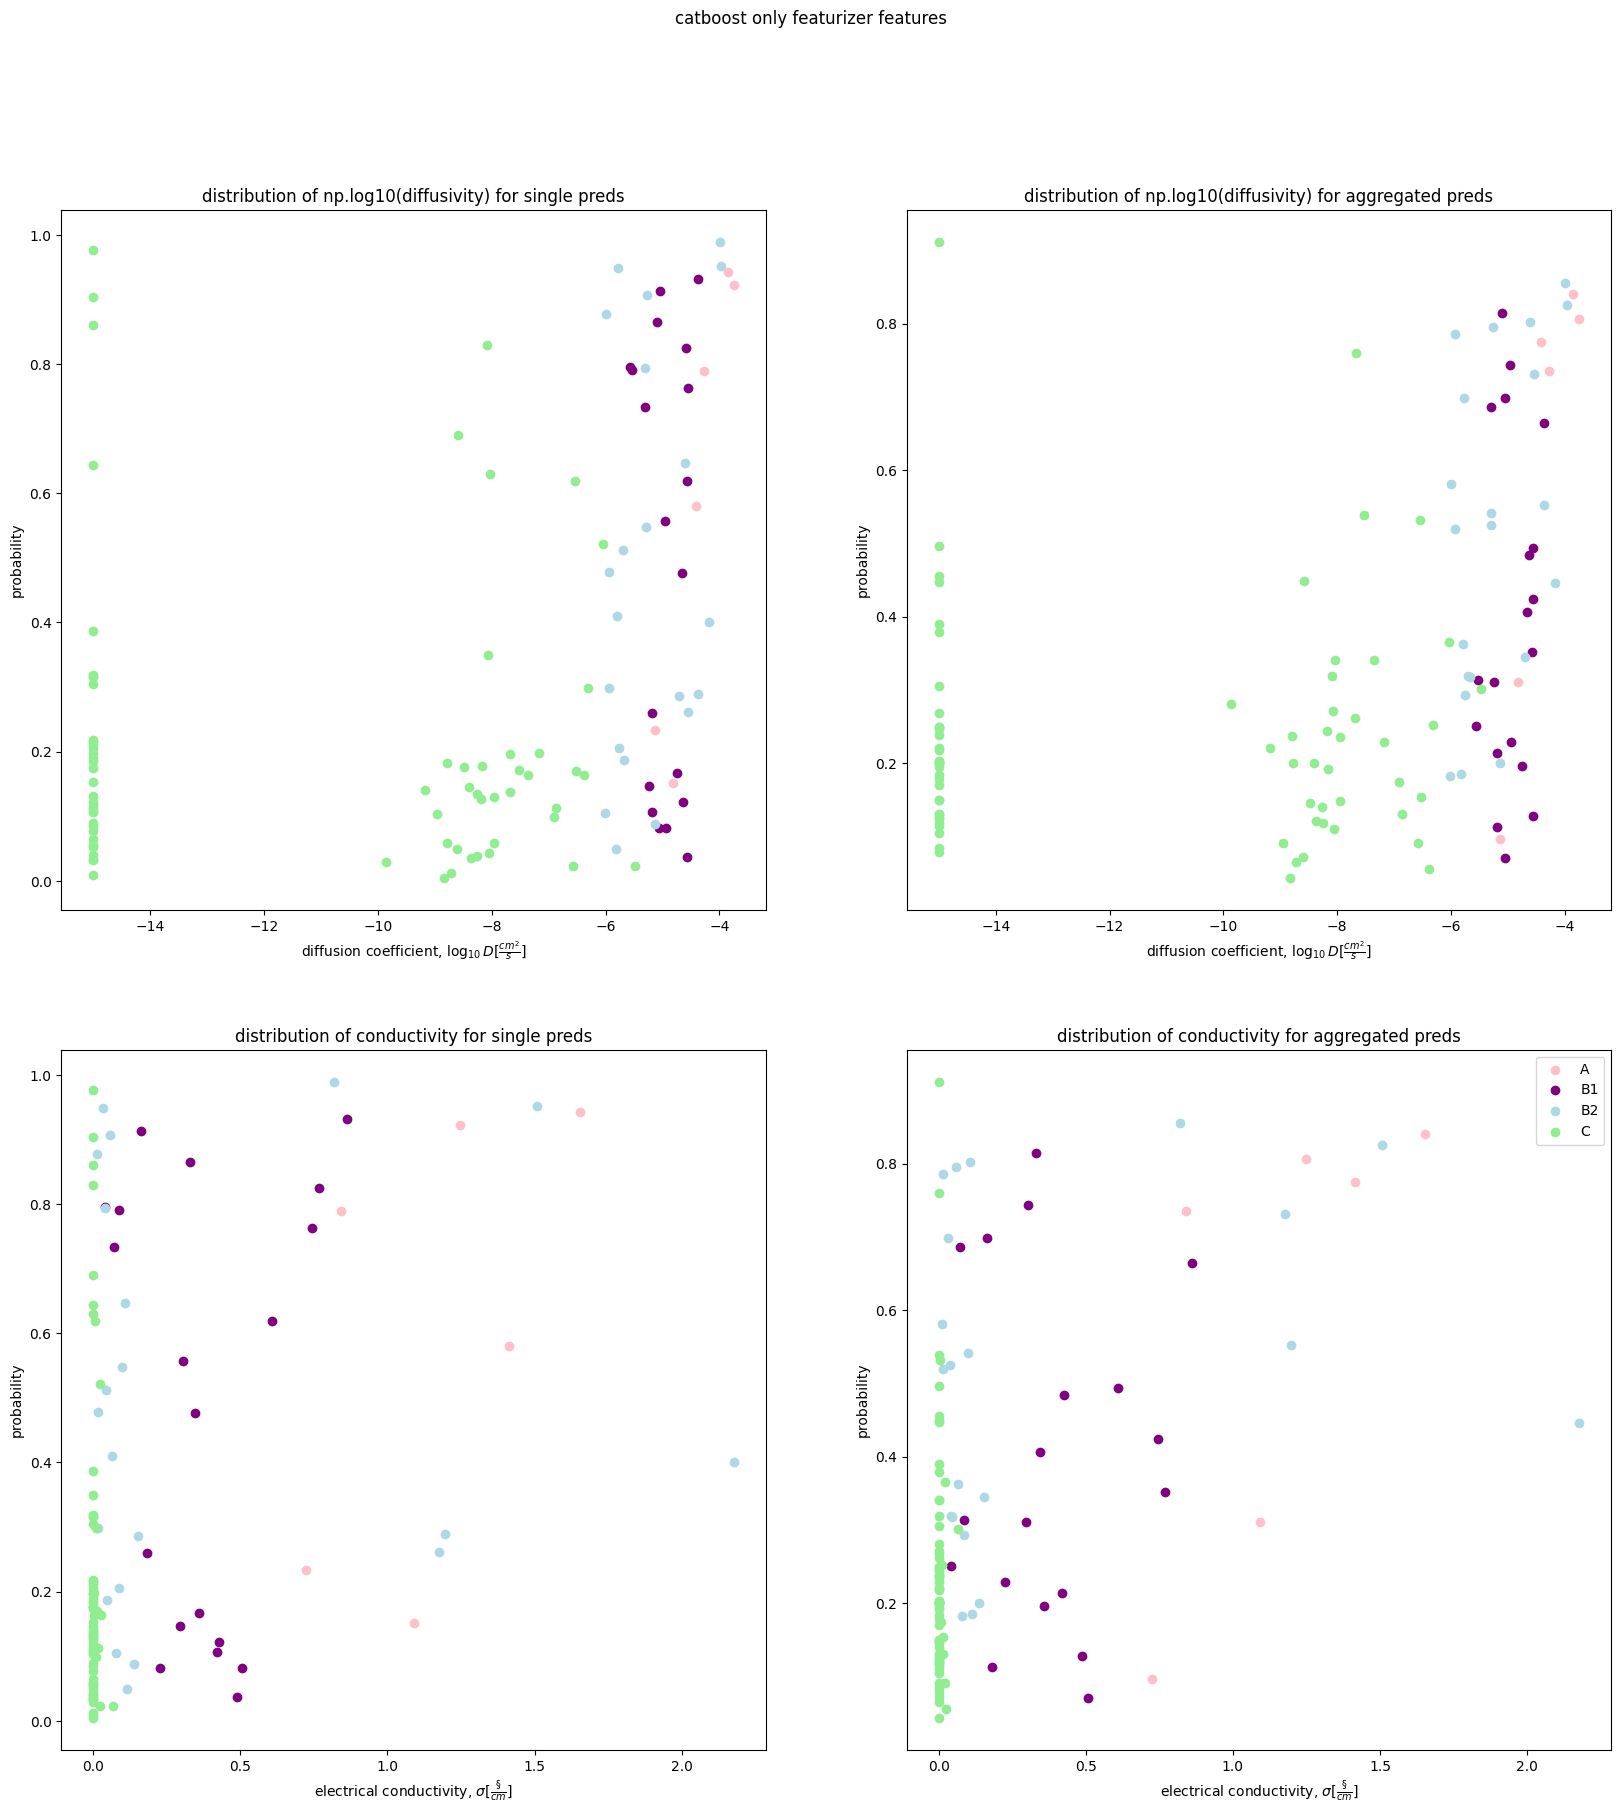

In [15]:
plot_distribution_compared(
        df_kahle_fin,
        preds_kahle[0],
        np.array(preds_kahle).sum(axis = 0) / len(preds_kahle), 
        'catboost only featurizer features'
        )

In [2]:
def get_nn_features():
    df_barrier_features_kahle = pd.read_csv('fv.v2.Kahle2020-upd2024-03-04/exported.predictions.Kahle2020.v2.csv')

    barrier_robust_0p_features = list(filter(lambda x: x.find('barrier_robust_0p') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
    union_features = list(filter(lambda x: x.find('union') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
    df_barrier_features_kahle = df_barrier_features_kahle[barrier_robust_0p_features + union_features + ['src_id', 'diffusion_mean_cm2_s']]

    kahle = pd.read_csv('kahle.csv')
    df_kahle_fin = df_barrier_features_kahle.merge(kahle, left_on = ['src_id', 'diffusion_mean_cm2_s'], right_on = ['src_id', 'diffusion_mean_cm2_s'])
    df_kahle_fin = dataset_preprocessing(df_kahle_fin, 'structure')

    return df_kahle_fin


In [3]:
df_mpdb_nn = pd.read_csv('fv.v2.Kahle2020-upd2024-03-04/exported.predictions.mp.v2.csv')

barrier_robust_0p_features = list(filter(lambda x: x.find('barrier_robust_0p') != -1 and x.find('masked1p5') == -1, df_mpdb_nn.columns.to_list()))
union_features = list(filter(lambda x: x.find('union') != -1 and x.find('masked1p5') == -1, df_mpdb_nn.columns.to_list()))
df_mpdb_nn = df_mpdb_nn[barrier_robust_0p_features + union_features + ['material_id']]


In [7]:
df_mpdb_plane['material_id'].to_list() == df_mpdb_nn['material_id'].to_list()

True

In [5]:
df_kahle_fin_nn = get_nn_features()


X_nn = df_kahle_fin_nn.drop([ 
    'src_id',
    'diffusion_mean_cm2_s',
    'stru_label', 
    'stru_id', 
    'structure', 
    'group', 
    'label', 
    'diffusion_sem_cm2_s', 
    'n_Li', 
    'sigma_S_cm', 
    'sigma_S_cm_sem', 
    'sigma_S_cm_err'
 ], axis=1)

X_mpdb_nn = df_mpdb_nn.drop([ 
    'material_id',
 ], axis=1)

In [6]:
feature_names_nn = X_nn.columns.to_numpy()

X_nn = X_nn.to_numpy()
X_mpdb_nn = X_mpdb_nn.to_numpy()
X_mpdb_nn = StandardScaler().fit_transform(X_mpdb_nn)



In [ ]:
params = {
        "max_depth": 3,
        "learning_rate" : 0.9,
        "iterations": 3,
    }

test_roc_auc, train_roc_auc, roc_like_comparison, preds_kahle, feature_importance, feature_entarances, y, preds_mpdb = evaluate_parameters(params, X_nn, df_kahle_fin_nn, feature_weights = np.ones(X_nn.shape[1]), thr_positive = 1e-1, thr_negative = 1e-2, model_name = 'catboost', X_mpdb = X_mpdb_nn)

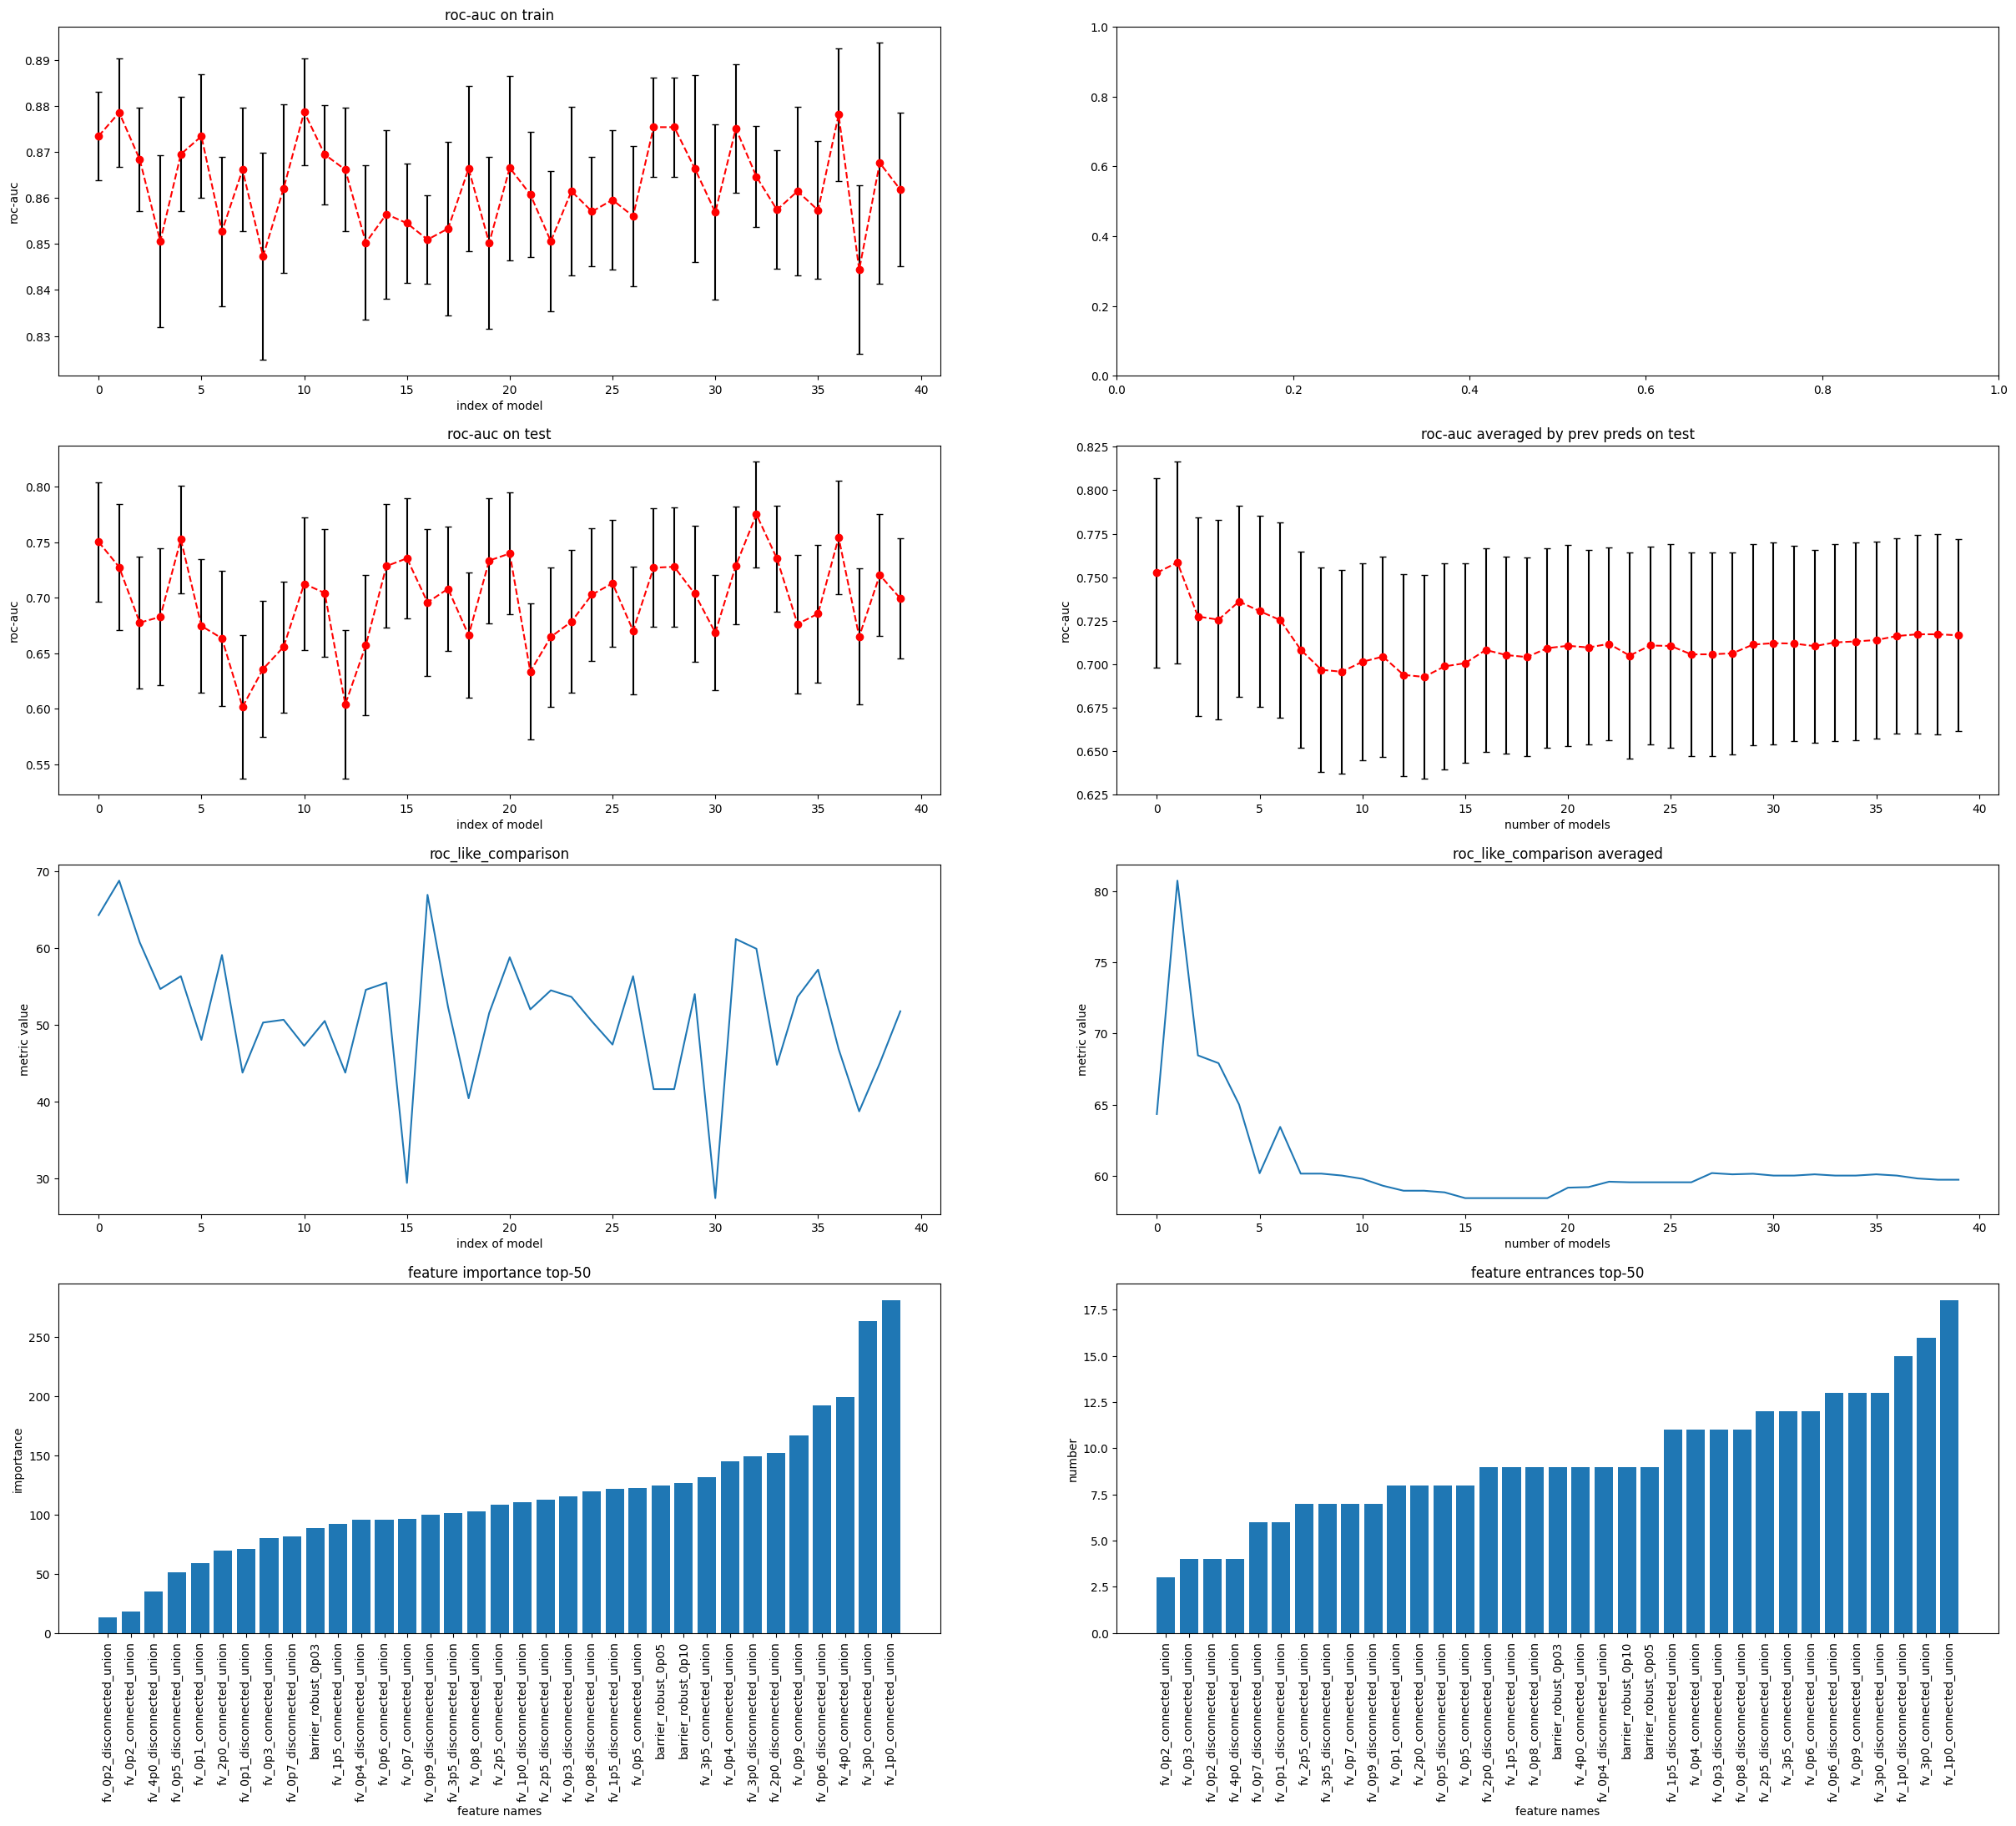

In [9]:
roc_like_comparison_averaged, roc_auc_averaged = plot_statistics(df_kahle_fin_nn, feature_names_nn, feature_entarances, feature_importance, train_roc_auc, test_roc_auc, roc_like_comparison, preds_kahle, y)

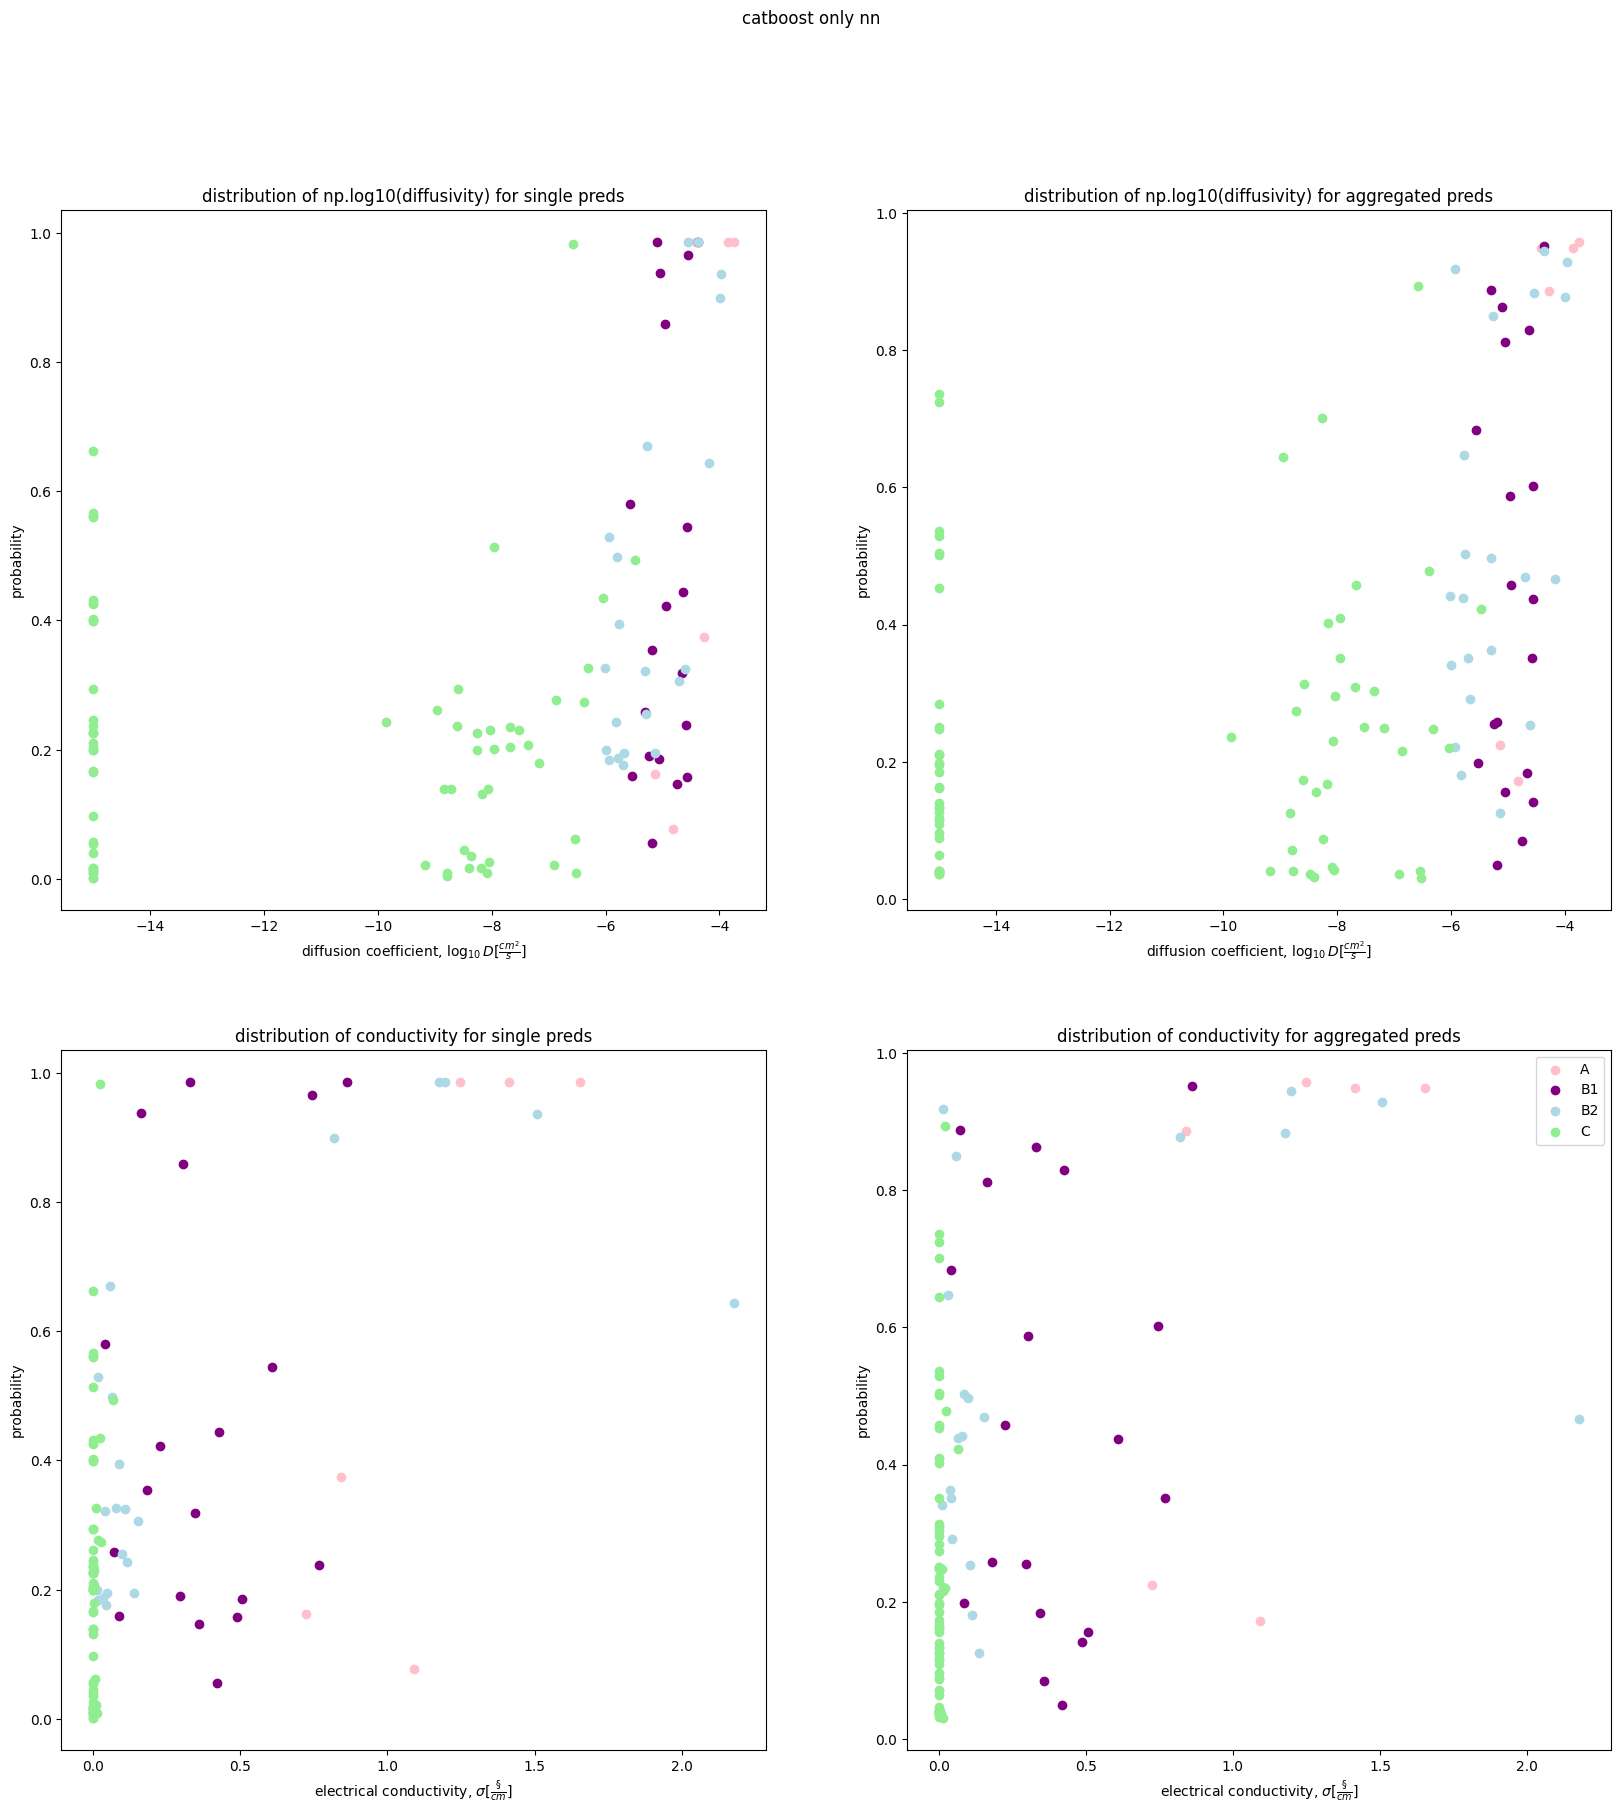

In [10]:
plot_distribution_compared(
        df_kahle_fin_nn,
        preds_kahle[0],
        np.array(preds_kahle).sum(axis = 0) / len(preds_kahle), 
        'catboost only nn'
        )

In [11]:
print(f'roc_like_comparison: {roc_like_comparison_averaged[-1]}, roc_auc on test {roc_auc_averaged[-1][0]}, mean train roc-auc {np.array(train_roc_auc)[:, 0].mean()}')

roc_like_comparison: 59.708011486115154, roc_auc on test 0.7166534519206298, mean train roc-auc 0.862320732365886


In [12]:
np.savetxt('predictions/catboost_only_nn_max_depth_3_lr_0.9_n_estimators_3.txt', preds_mpdb)

In [17]:
X_merged = np.concatenate([X, X_nn], axis = 1)
feature_weights_merged = np.concatenate([[1 / cnt_and_name_features_kahle['_'.join(x.split('_')[1:])] for x in feature_names], np.ones(X_nn.shape[1])],axis = 0)
feature_names_merged = np.concatenate([feature_names, feature_names_nn], axis = 0)

In [18]:
X_mpdb_merged = np.concatenate([X_mpdb, X_mpdb_nn], axis = 1)

In [19]:
assert X_merged.shape[1] == X_mpdb_merged.shape[1]

In [20]:
params = {
        "max_depth": 3,
        "learning_rate" : 0.9,
        "iterations": 3,
    }


test_roc_auc, train_roc_auc, roc_like_comparison, preds_kahle, feature_importance, feature_entarances, y, preds_mpdb = evaluate_parameters(params, X_merged, df_kahle_fin, feature_weights = feature_weights_merged, thr_positive = 1e-1, thr_negative = 1e-2, model_name = 'catboost', X_mpdb = X_mpdb_merged)

  0%|          | 0/116 [00:00<?, ?it/s]

  1%|          | 1/116 [00:00<01:08,  1.67it/s]

roc-auc on train for 0 fold with size 118: 0.8219733852645245


100%|██████████| 116/116 [01:14<00:00,  1.55it/s]


test roc-auc mean: 0.6084032263151119, std: 0.06346889887103133
mean train roc-auc: 0.8164550661885592


  1%|          | 1/116 [00:00<01:09,  1.65it/s]

roc-auc on train for 0 fold with size 118: 0.8589743589743589


100%|██████████| 116/116 [01:15<00:00,  1.53it/s]


test roc-auc mean: 0.6190923211181693, std: 0.06523982592389585
mean train roc-auc: 0.8218487621500196


  1%|          | 1/116 [00:00<01:20,  1.43it/s]

roc-auc on train for 0 fold with size 118: 0.832684193443687


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.6208401632826186, std: 0.06839279725658373
mean train roc-auc: 0.8256714163369426


  1%|          | 1/116 [00:00<01:07,  1.71it/s]

roc-auc on train for 0 fold with size 118: 0.814508276533593


100%|██████████| 116/116 [01:14<00:00,  1.55it/s]


test roc-auc mean: 0.5387361037180222, std: 0.07081913223839027
mean train roc-auc: 0.8138431018909588


  1%|          | 1/116 [00:00<01:20,  1.44it/s]

roc-auc on train for 0 fold with size 118: 0.8166179811749433


100%|██████████| 116/116 [01:16<00:00,  1.52it/s]


test roc-auc mean: 0.625357624412419, std: 0.06194247213509362
mean train roc-auc: 0.8290170086653106


  1%|          | 1/116 [00:00<01:19,  1.44it/s]

roc-auc on train for 0 fold with size 118: 0.8240830899058748


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.6332681237224616, std: 0.059775100144797075
mean train roc-auc: 0.8231836223169228


  1%|          | 1/116 [00:00<01:21,  1.42it/s]

roc-auc on train for 0 fold with size 118: 0.8033106134371956


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.5373969083537242, std: 0.06455665852375916
mean train roc-auc: 0.8200036463496779


  1%|          | 1/116 [00:00<01:18,  1.46it/s]

roc-auc on train for 0 fold with size 118: 0.8455047062641999


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.54204844275485, std: 0.07151474831904829
mean train roc-auc: 0.8310745003809722


  1%|          | 1/116 [00:00<01:14,  1.54it/s]

roc-auc on train for 0 fold with size 118: 0.8260305095748134


100%|██████████| 116/116 [01:14<00:00,  1.55it/s]


test roc-auc mean: 0.5728048872072636, std: 0.06047624244238663
mean train roc-auc: 0.8129788212036361


  1%|          | 1/116 [00:00<01:14,  1.54it/s]

roc-auc on train for 0 fold with size 118: 0.8591366439467706


100%|██████████| 116/116 [01:14<00:00,  1.55it/s]


test roc-auc mean: 0.588749926178705, std: 0.06637646253698826
mean train roc-auc: 0.8156859116284693


  1%|          | 1/116 [00:00<01:16,  1.51it/s]

roc-auc on train for 0 fold with size 118: 0.8099642973060694


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.4990048279041358, std: 0.06655158735516888
mean train roc-auc: 0.8174367397862079


  1%|          | 1/116 [00:00<01:14,  1.54it/s]

roc-auc on train for 0 fold with size 118: 0.8161311262577086


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.5896562690509982, std: 0.06052140691469207
mean train roc-auc: 0.8250447829946557


  1%|          | 1/116 [00:00<01:22,  1.39it/s]

roc-auc on train for 0 fold with size 118: 0.8185654008438819


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.6444282313772048, std: 0.06557426337234204
mean train roc-auc: 0.8266459476286366


  1%|          | 1/116 [00:00<01:21,  1.41it/s]

roc-auc on train for 0 fold with size 118: 0.8576760791950665


100%|██████████| 116/116 [01:14<00:00,  1.56it/s]


test roc-auc mean: 0.6105796829023564, std: 0.06480827049106402
mean train roc-auc: 0.822506219236542


  1%|          | 1/116 [00:00<01:18,  1.46it/s]

roc-auc on train for 0 fold with size 118: 0.824732229795521


100%|██████████| 116/116 [01:15<00:00,  1.55it/s]


test roc-auc mean: 0.6332648322381106, std: 0.06448421825630747
mean train roc-auc: 0.821579498596132


  1%|          | 1/116 [00:00<01:26,  1.33it/s]

roc-auc on train for 0 fold with size 118: 0.8067185978578383


100%|██████████| 116/116 [01:16<00:00,  1.51it/s]


test roc-auc mean: 0.5695171430538291, std: 0.06503874069341341
mean train roc-auc: 0.821199261923675


  1%|          | 1/116 [00:00<01:19,  1.45it/s]

roc-auc on train for 0 fold with size 118: 0.8974358974358975


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.61908641792564, std: 0.06432409781618006
mean train roc-auc: 0.8305571719317978


  1%|          | 1/116 [00:00<01:18,  1.47it/s]

roc-auc on train for 0 fold with size 118: 0.7711781888997078


100%|██████████| 116/116 [01:14<00:00,  1.55it/s]


test roc-auc mean: 0.5786992434458565, std: 0.07043491572805498
mean train roc-auc: 0.8203551784994797


  1%|          | 1/116 [00:00<01:19,  1.45it/s]

roc-auc on train for 0 fold with size 118: 0.7887049659201559


100%|██████████| 116/116 [01:15<00:00,  1.55it/s]


test roc-auc mean: 0.6259818406644181, std: 0.059806296374897754
mean train roc-auc: 0.8219798938749058


  1%|          | 1/116 [00:00<01:17,  1.48it/s]

roc-auc on train for 0 fold with size 118: 0.8557286595261279


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.65363266480012, std: 0.060693124120084485
mean train roc-auc: 0.8265106386672074


  1%|          | 1/116 [00:00<01:09,  1.66it/s]

roc-auc on train for 0 fold with size 118: 0.7218435572865952


100%|██████████| 116/116 [01:15<00:00,  1.53it/s]


test roc-auc mean: 0.583444451118678, std: 0.06919895029630667
mean train roc-auc: 0.8154746567606564


  1%|          | 1/116 [00:00<01:17,  1.48it/s]

roc-auc on train for 0 fold with size 118: 0.8372281726712106


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.5963354331442481, std: 0.06232224491642307
mean train roc-auc: 0.8208171398113018


  1%|          | 1/116 [00:00<01:14,  1.55it/s]

roc-auc on train for 0 fold with size 118: 0.833495618305745


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.6604202601531217, std: 0.05941814969347322
mean train roc-auc: 0.8068447157023522


  1%|          | 1/116 [00:00<01:17,  1.49it/s]

roc-auc on train for 0 fold with size 118: 0.7779941577409932


100%|██████████| 116/116 [01:14<00:00,  1.55it/s]


test roc-auc mean: 0.6246281699056053, std: 0.06607418616278081
mean train roc-auc: 0.8306510214638811


  1%|          | 1/116 [00:00<01:13,  1.56it/s]

roc-auc on train for 0 fold with size 118: 0.8438818565400844


100%|██████████| 116/116 [01:15<00:00,  1.53it/s]


test roc-auc mean: 0.5945111236772364, std: 0.0687796735676002
mean train roc-auc: 0.8278426686033361


  1%|          | 1/116 [00:00<01:27,  1.31it/s]

roc-auc on train for 0 fold with size 118: 0.8528075300227198


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.565572301929475, std: 0.071986532305407
mean train roc-auc: 0.8247570239977061


  1%|          | 1/116 [00:00<01:23,  1.38it/s]

roc-auc on train for 0 fold with size 118: 0.8581629341123013


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.5849649034833778, std: 0.06344698681821857
mean train roc-auc: 0.8172557352532737


  1%|          | 1/116 [00:00<01:23,  1.38it/s]

roc-auc on train for 0 fold with size 118: 0.8149951314508277


100%|██████████| 116/116 [01:14<00:00,  1.55it/s]


test roc-auc mean: 0.718319305895209, std: 0.056109308097488944
mean train roc-auc: 0.8141407137726042


  1%|          | 1/116 [00:00<01:14,  1.53it/s]

roc-auc on train for 0 fold with size 118: 0.7773450178513469


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.5862437369462243, std: 0.06794702863708622
mean train roc-auc: 0.8277119252873562


  1%|          | 1/116 [00:00<01:15,  1.53it/s]

roc-auc on train for 0 fold with size 118: 0.8432327166504382


100%|██████████| 116/116 [01:14<00:00,  1.56it/s]


test roc-auc mean: 0.6001110580972745, std: 0.06827784110155198
mean train roc-auc: 0.8114911414605118


  1%|          | 1/116 [00:00<01:18,  1.46it/s]

roc-auc on train for 0 fold with size 118: 0.8114248620577734


100%|██████████| 116/116 [01:15<00:00,  1.53it/s]


test roc-auc mean: 0.615442804598335, std: 0.06310221449162141
mean train roc-auc: 0.8162413754814797


  1%|          | 1/116 [00:00<01:13,  1.57it/s]

roc-auc on train for 0 fold with size 118: 0.8800714053878612


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.6652197689749845, std: 0.061538456340847814
mean train roc-auc: 0.8256476005202251


  1%|          | 1/116 [00:00<01:34,  1.22it/s]

roc-auc on train for 0 fold with size 118: 0.7940603700097372


100%|██████████| 116/116 [01:15<00:00,  1.53it/s]


test roc-auc mean: 0.6946263533965521, std: 0.05027315282515455
mean train roc-auc: 0.8222808978916796


  1%|          | 1/116 [00:00<01:15,  1.52it/s]

roc-auc on train for 0 fold with size 118: 0.7796170074651088


100%|██████████| 116/116 [01:14<00:00,  1.55it/s]


test roc-auc mean: 0.4892663120668468, std: 0.07171375023409708
mean train roc-auc: 0.8128162232951389


  1%|          | 1/116 [00:00<01:21,  1.40it/s]

roc-auc on train for 0 fold with size 118: 0.7698799091204155


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.6237852759273271, std: 0.0633815519215511
mean train roc-auc: 0.8145349805663009


  1%|          | 1/116 [00:00<01:16,  1.51it/s]

roc-auc on train for 0 fold with size 118: 0.7718273287893541


100%|██████████| 116/116 [01:15<00:00,  1.53it/s]


test roc-auc mean: 0.5727265563404376, std: 0.07596395869490906
mean train roc-auc: 0.8141175519002657


  1%|          | 1/116 [00:00<01:18,  1.46it/s]

roc-auc on train for 0 fold with size 118: 0.7859461213891593


100%|██████████| 116/116 [01:15<00:00,  1.54it/s]


test roc-auc mean: 0.5631462927995292, std: 0.0642262782169093
mean train roc-auc: 0.8237511190226263


  1%|          | 1/116 [00:00<01:10,  1.62it/s]

roc-auc on train for 0 fold with size 118: 0.8245699448231093


100%|██████████| 116/116 [01:17<00:00,  1.49it/s]


test roc-auc mean: 0.573746204036989, std: 0.06475737730058549
mean train roc-auc: 0.8170184077473255


  1%|          | 1/116 [00:00<01:10,  1.64it/s]

roc-auc on train for 0 fold with size 118: 0.824732229795521


100%|██████████| 116/116 [01:17<00:00,  1.49it/s]


test roc-auc mean: 0.5306116380481514, std: 0.06379574943389431
mean train roc-auc: 0.8228067027669735


  1%|          | 1/116 [00:00<01:20,  1.42it/s]

roc-auc on train for 0 fold with size 118: 0.8175916910094126


100%|██████████| 116/116 [01:17<00:00,  1.49it/s]


test roc-auc mean: 0.6401048716399831, std: 0.06740951928578799
mean train roc-auc: 0.8112280510311133


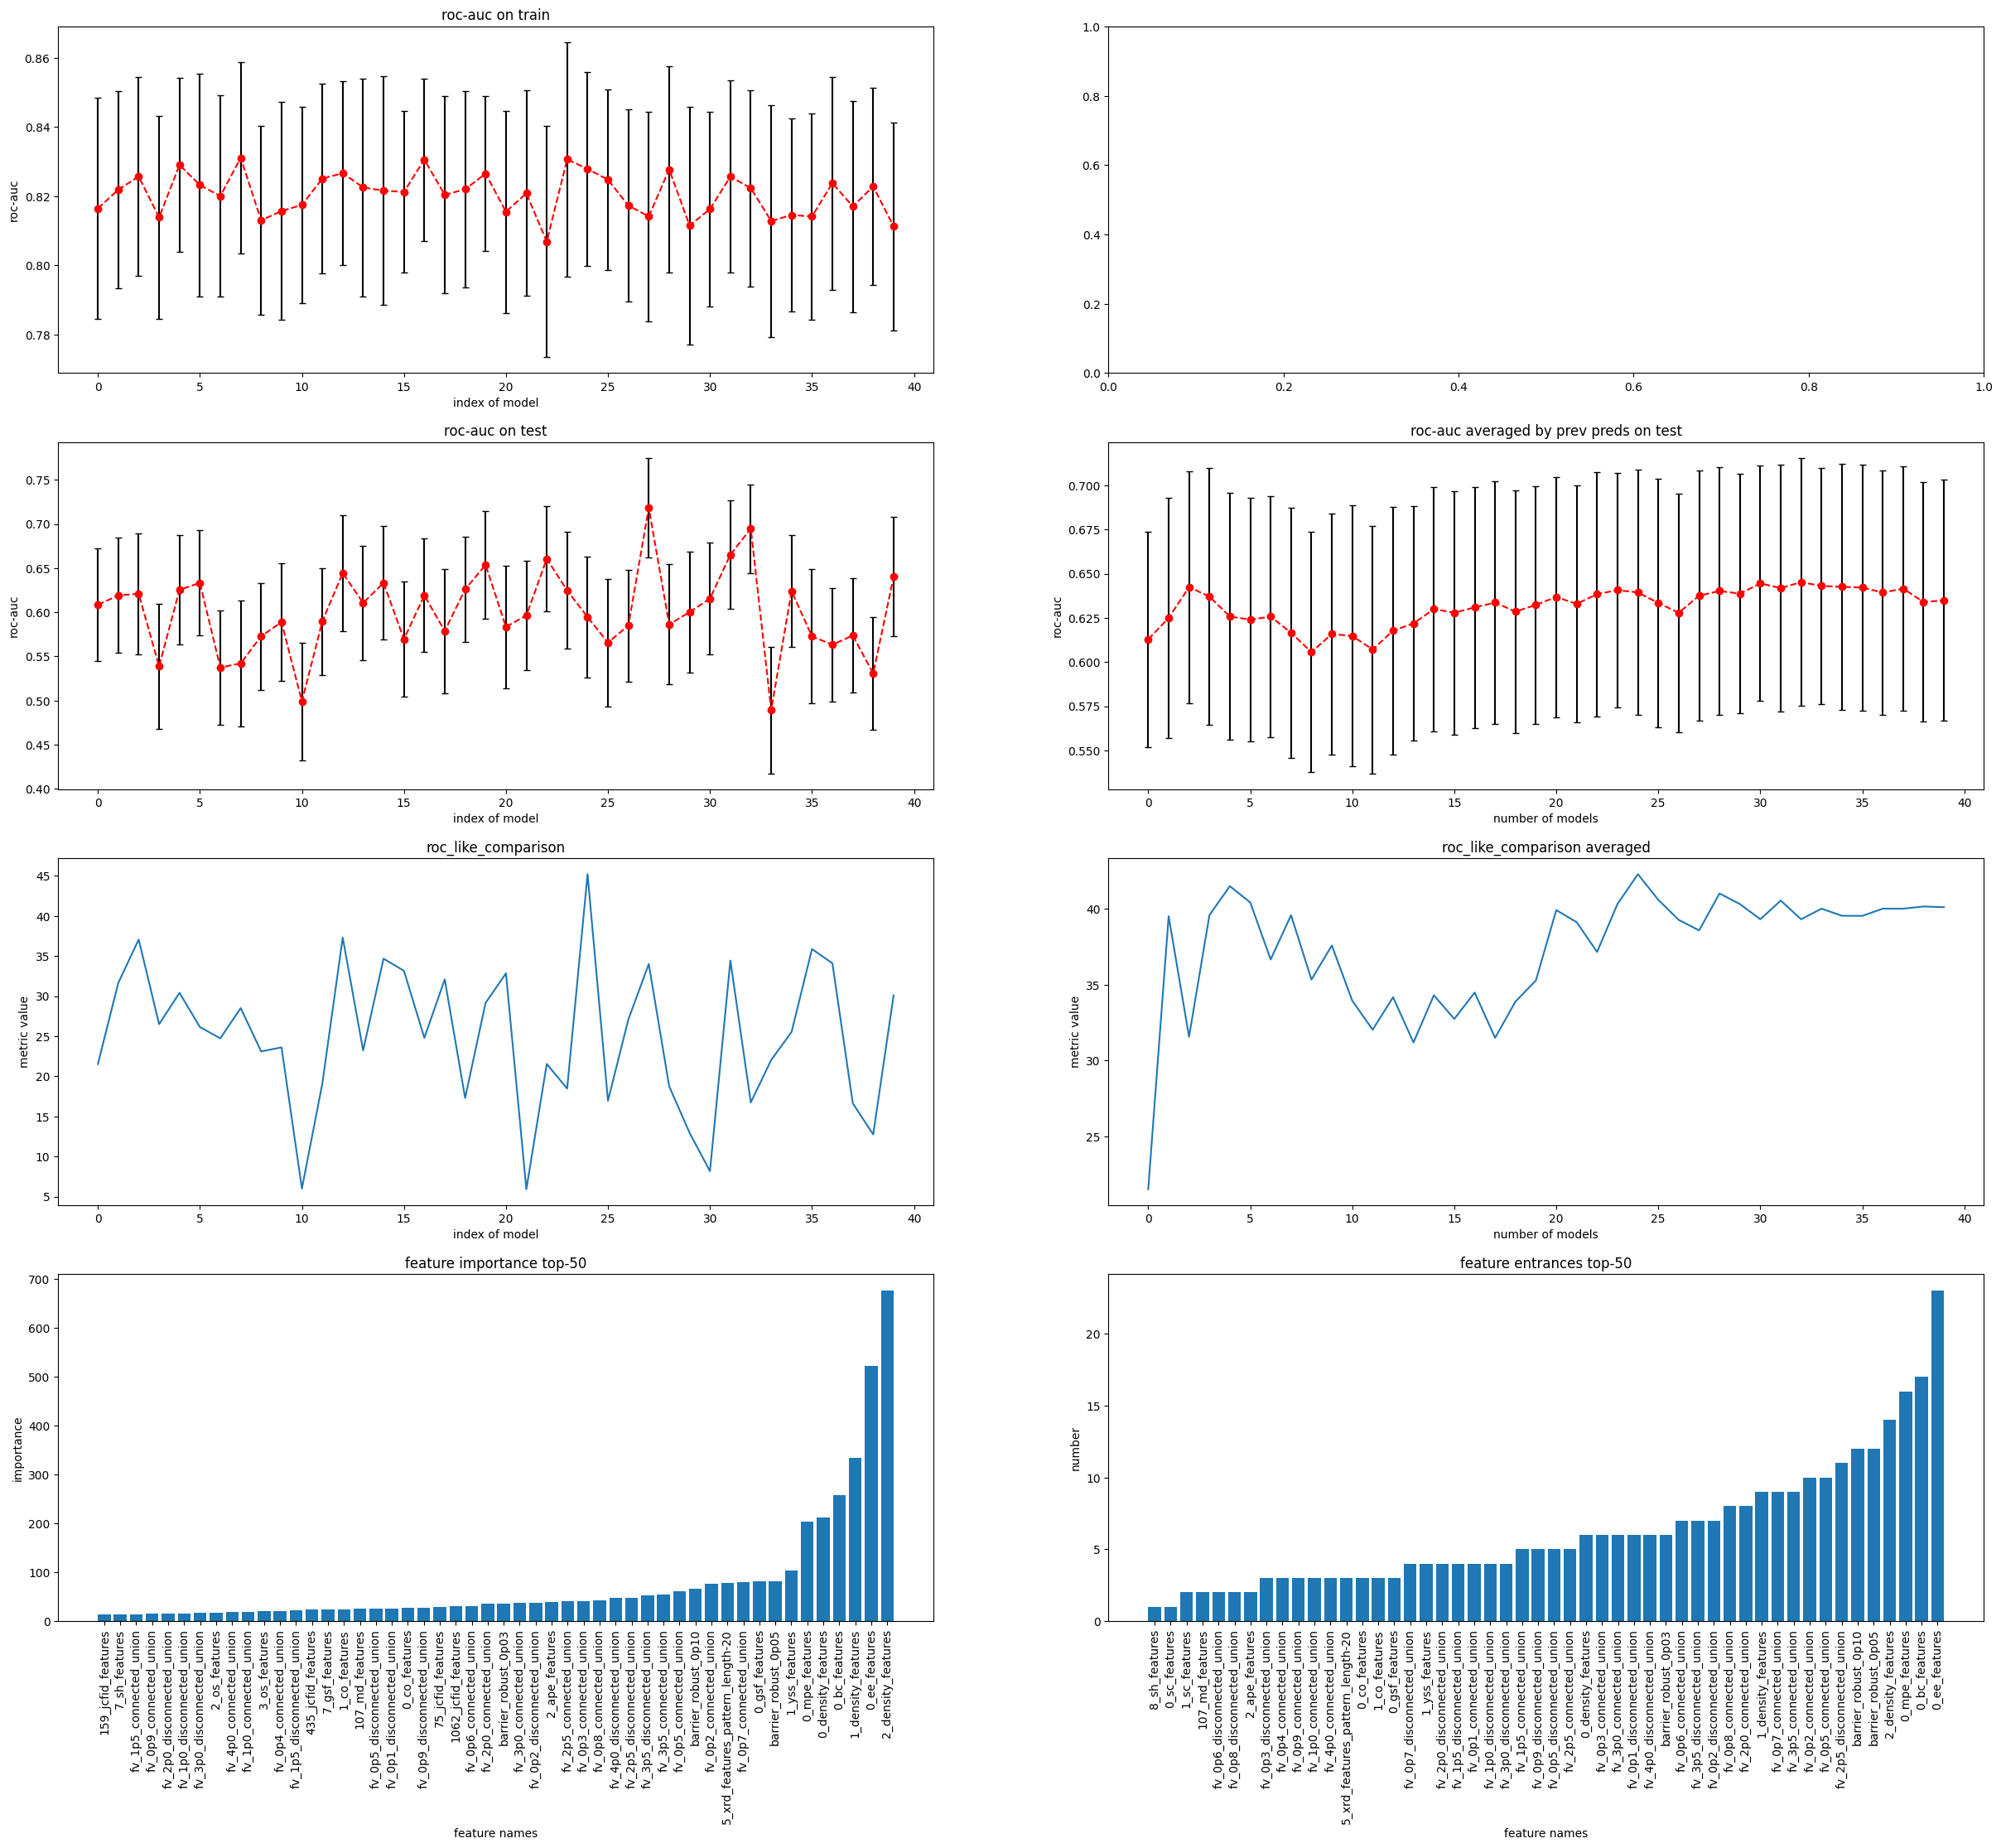

In [21]:
roc_like_comparison_averaged, roc_auc_averaged = plot_statistics(df_kahle_fin, feature_names_merged, feature_entarances, feature_importance, train_roc_auc, test_roc_auc, roc_like_comparison, preds_kahle, y)

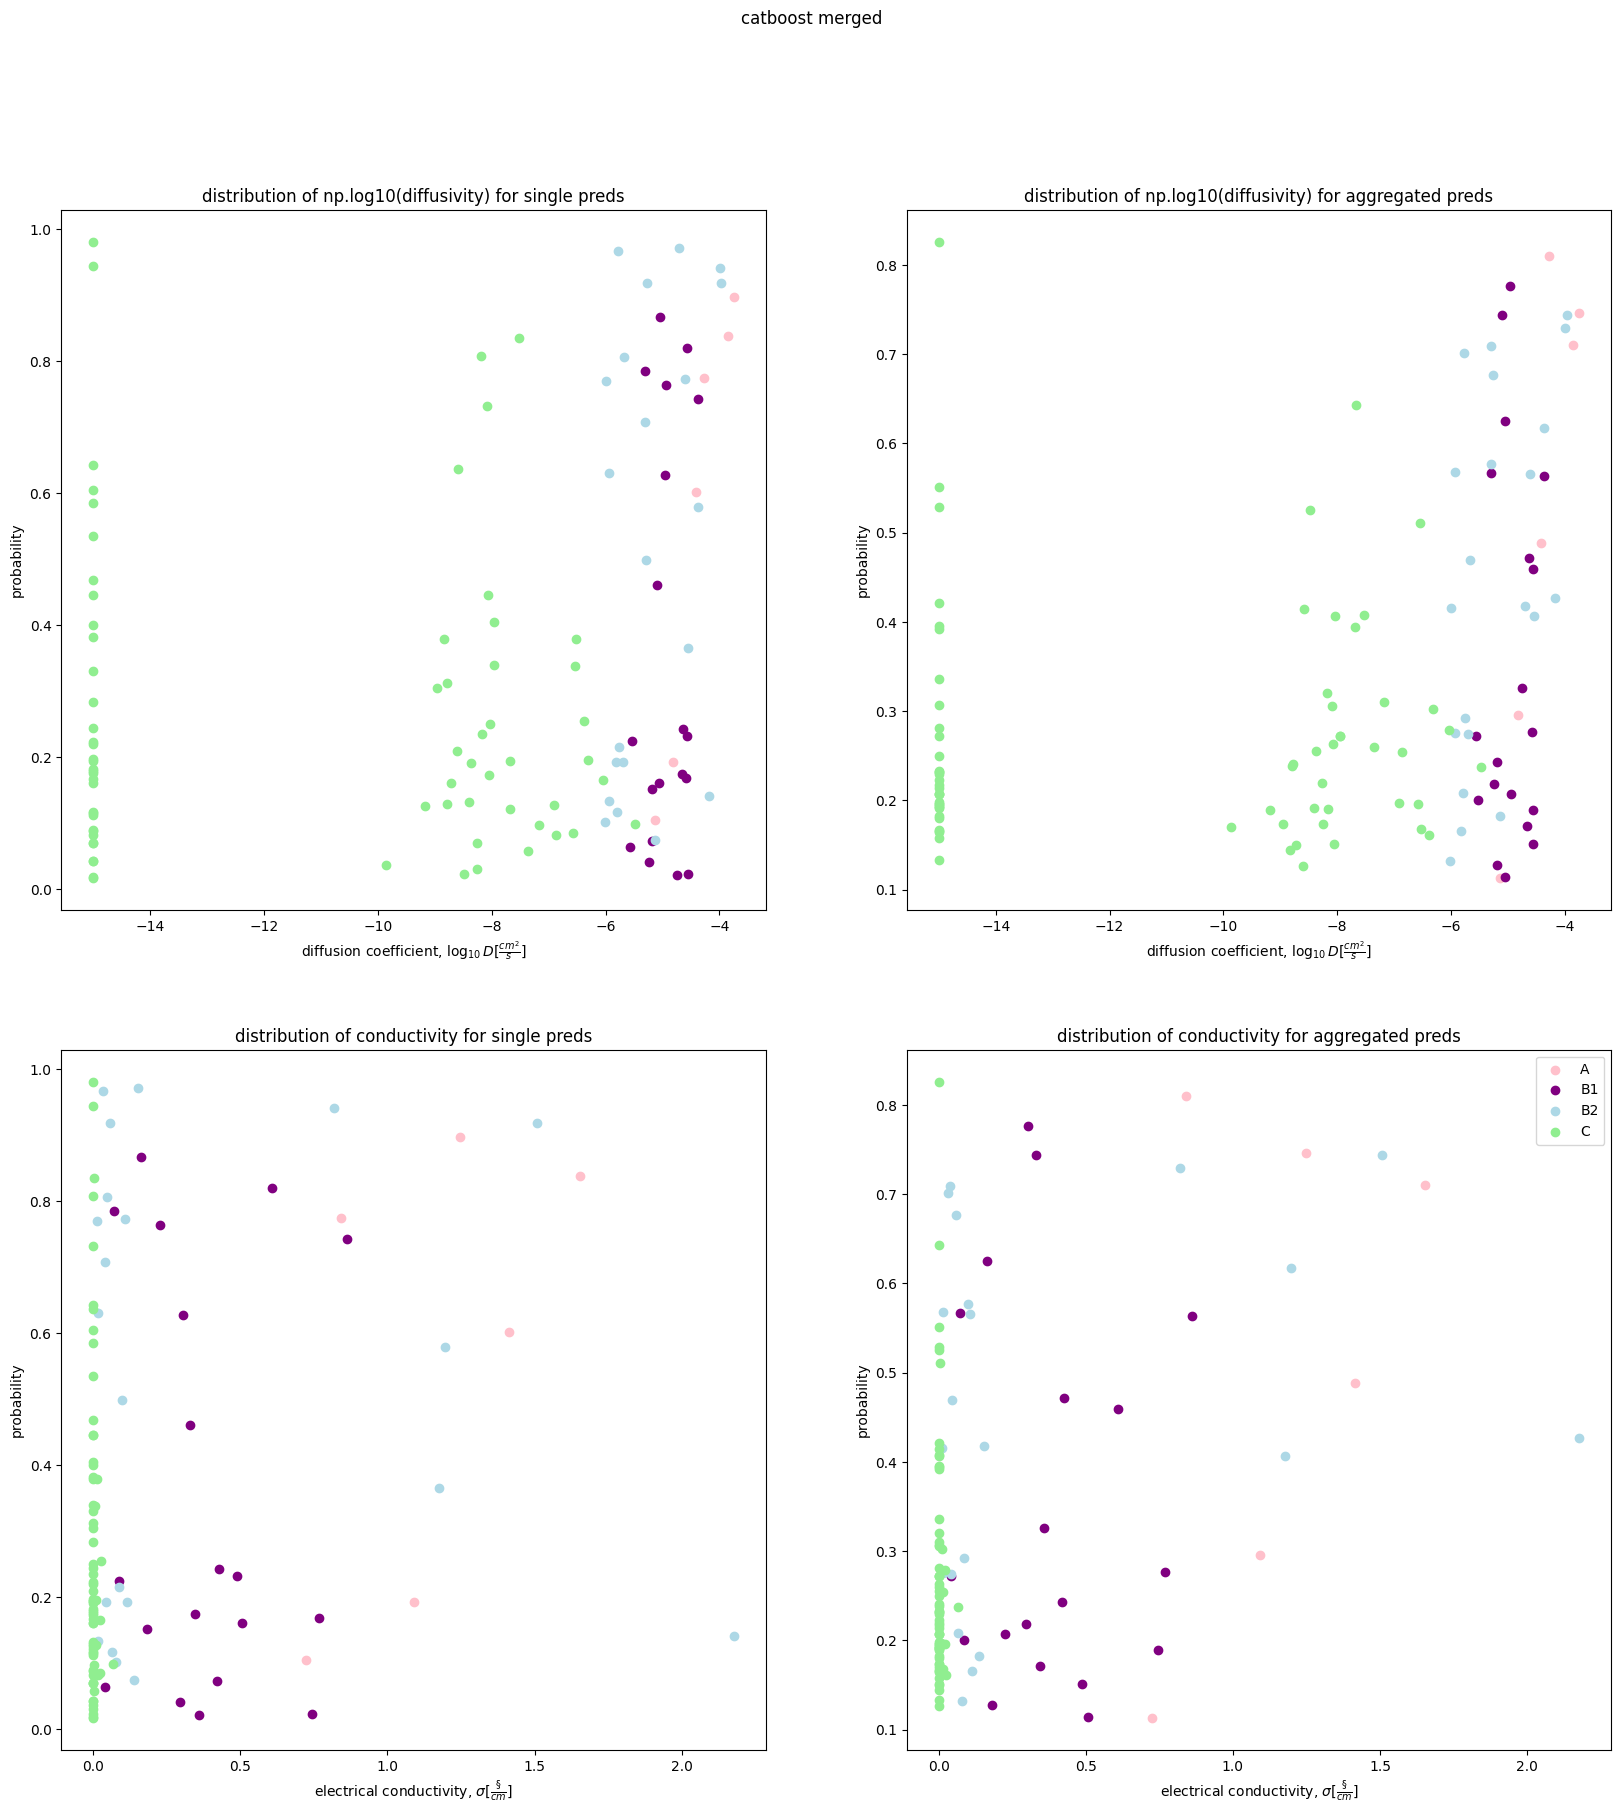

In [22]:
plot_distribution_compared(
        df_kahle_fin,
        preds_kahle[0],
        np.array(preds_kahle).sum(axis = 0) / len(preds_kahle), 
        'catboost merged'
        )

In [23]:
print(f'roc_like_comparison: {roc_like_comparison_averaged[-1]}, roc_auc on test {roc_auc_averaged[-1][0]}, mean train roc-auc {np.array(train_roc_auc)[:, 0].mean()}')

roc_like_comparison: 40.10066230868246, roc_auc on test 0.634914360218032, mean train roc-auc 0.8205251710646703


In [24]:
np.savetxt('predictions/catboost_merged_max_depth_3_lr_0.9_n_estimators_3.txt', preds_mpdb)

In [ ]:
params = {
        "objective" : "binary",
        "metric" : "binary_logloss",
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "max_depth": 3,
        "learning_rate" : 0.7,
        "n_estimators": 3,
        "verbosity" : -1,
    }


test_roc_auc, train_roc_auc, roc_like_comparison, all_preds, feature_importance, feature_entarances, y = evaluate_parameters(params, X, df_kahle_fin, feature_weights = feature_weights, thr_positive = 1e-1, thr_negative = 1e-2, model_name = 'catboost')

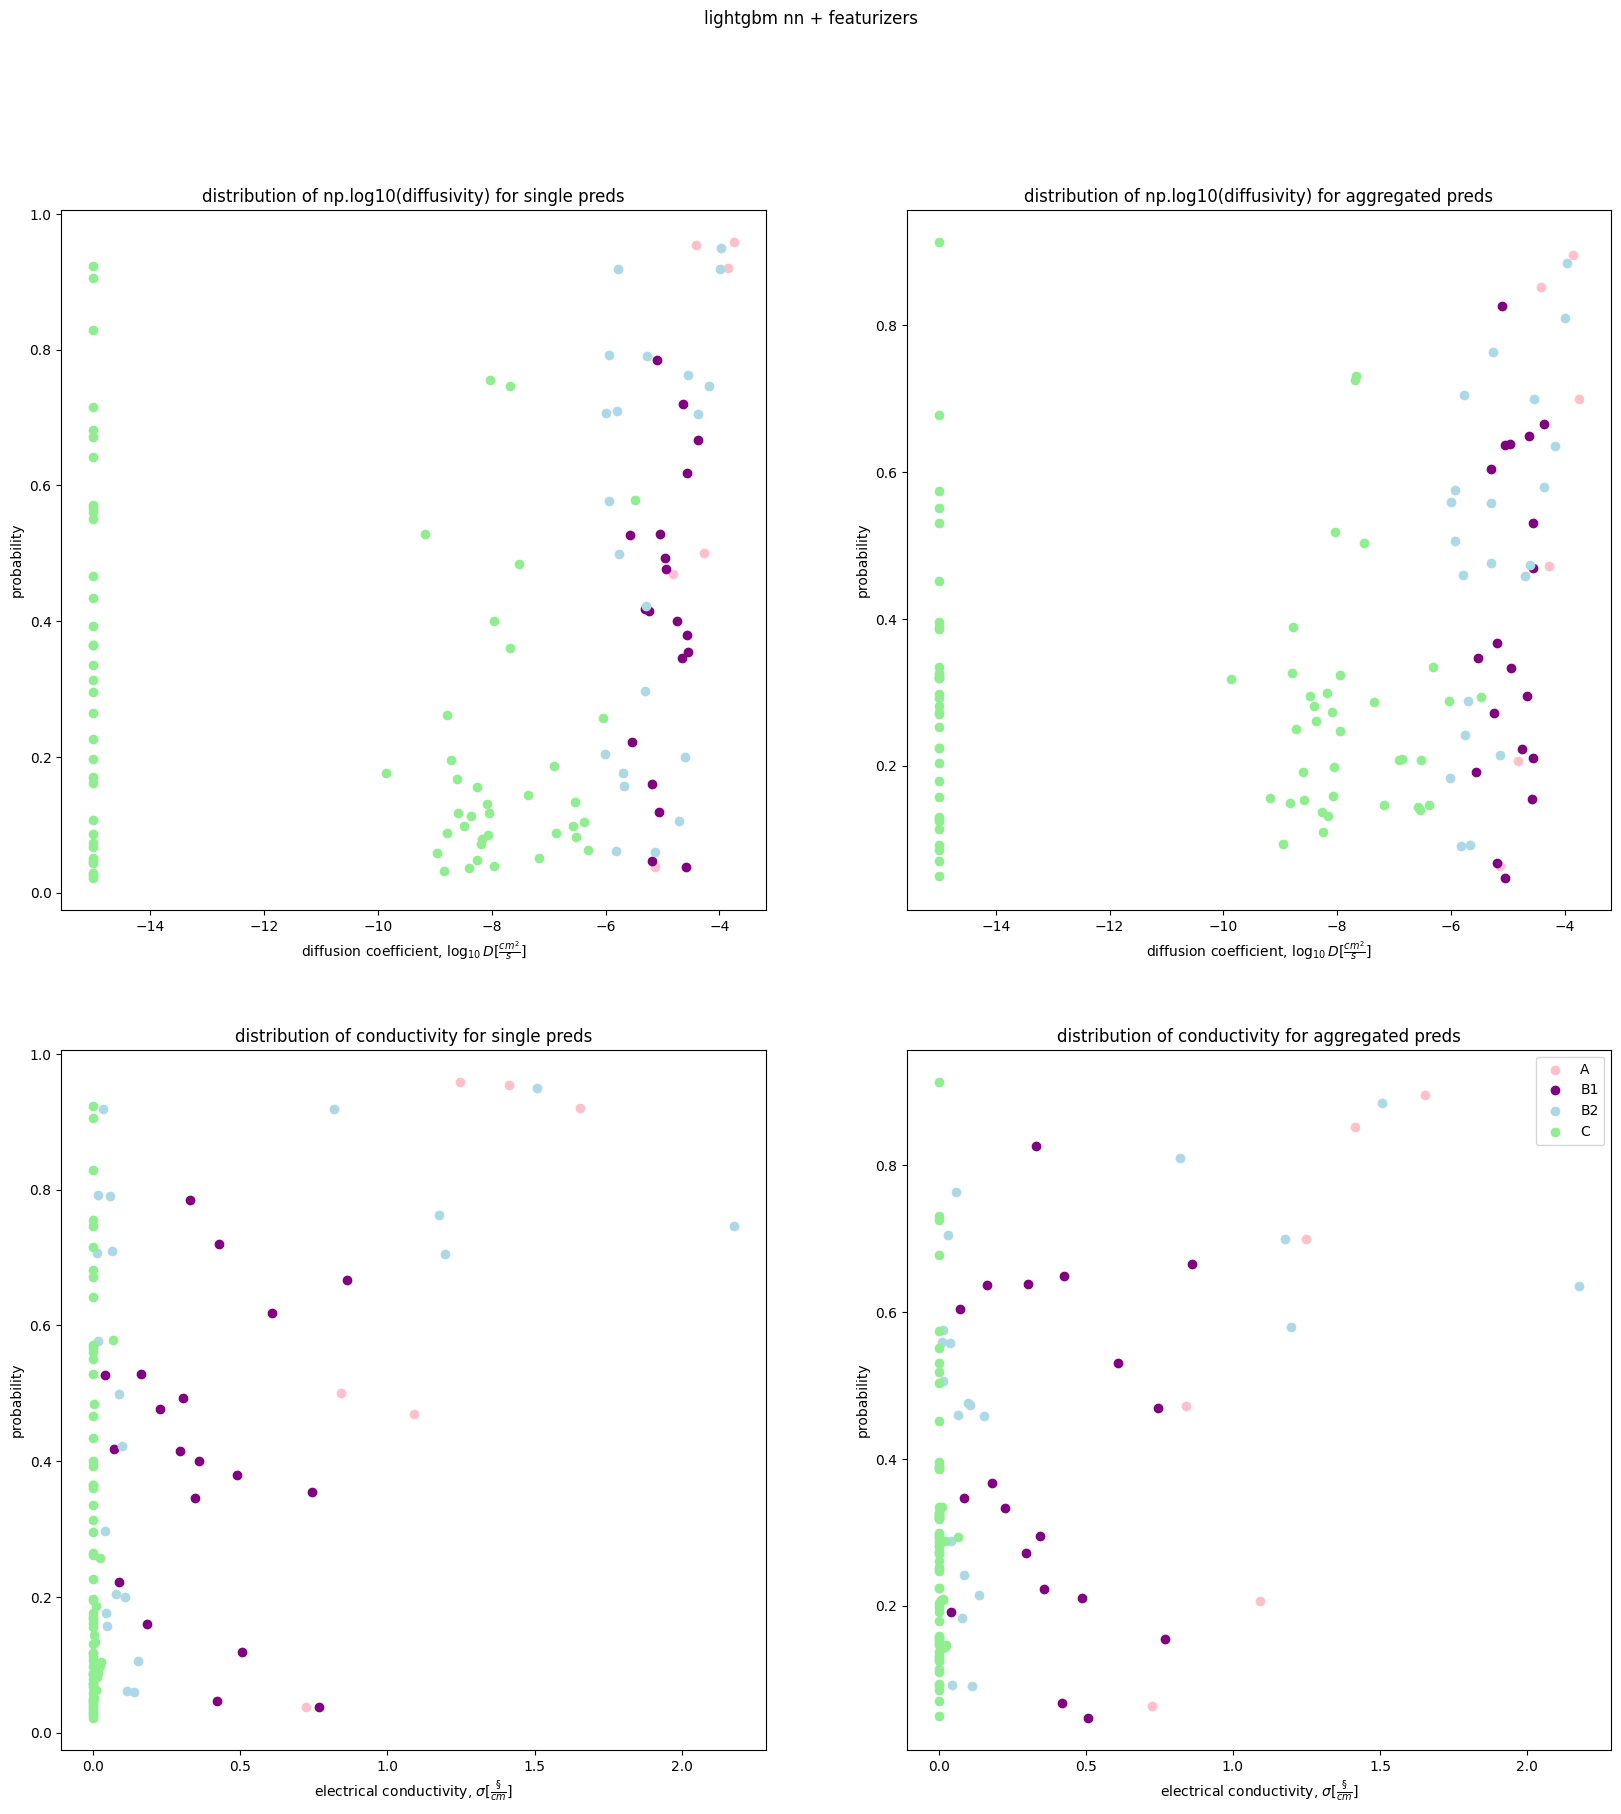

In [172]:
plot_distribution_compared(
        df_kahle_fin,
        all_preds[0],
        np.array(all_preds).sum(axis = 0) / len(all_preds), 
        'catboost nn + featurizers'
        )

In [25]:
roc_like_comparison_averaged, roc_auc_averaged = plot_statistics(df_kahle_fin, feature_names, feature_entarances, feature_importance, train_roc_auc, test_roc_auc, roc_like_comparison, all_preds, y)

NameError: name 'all_preds' is not defined

In [184]:
print(f'roc_like_comparison: {roc_like_comparison_averaged[-1]}, roc_auc on test {roc_auc_averaged[-1][0]}, mean train roc-auc {np.array(train_roc_auc)[:, 0].mean()}')

roc_like_comparison: 29.702233417960972, roc_auc on test 0.6633720629020099, mean train roc-auc 0.9317997438645751


100%|██████████| 116/116 [00:23<00:00,  4.91it/s]


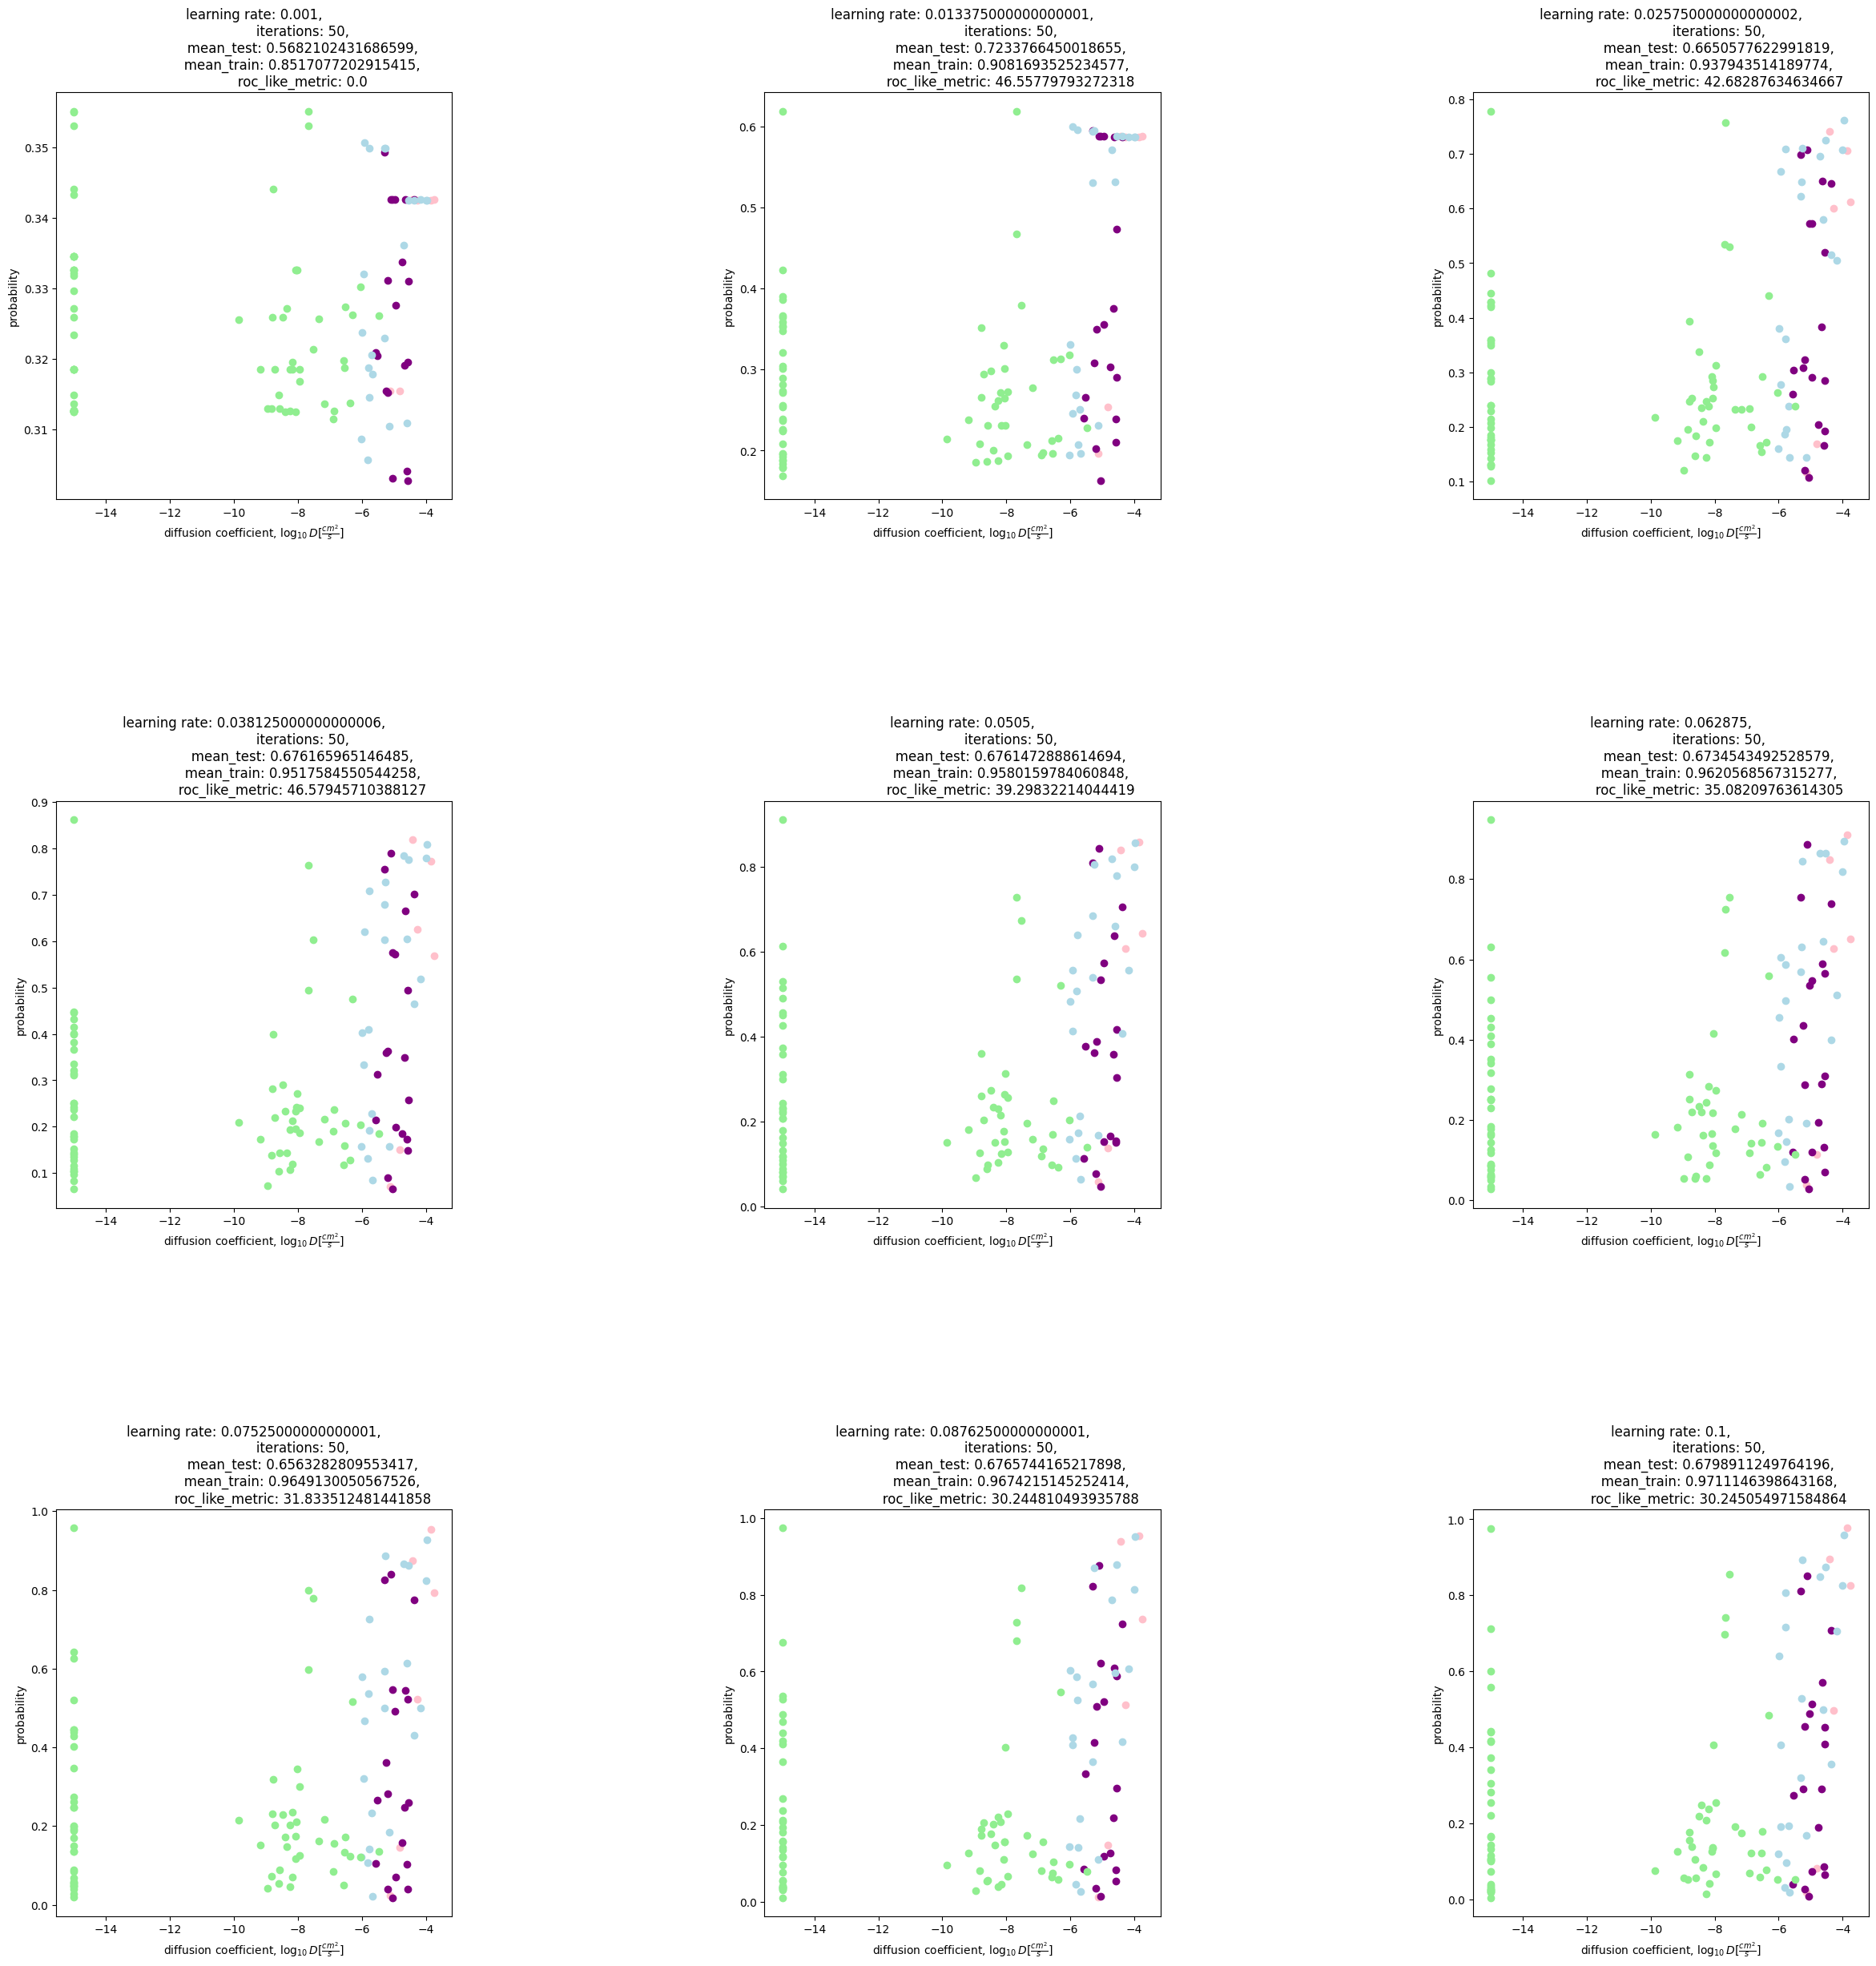

In [126]:
fig, axs = plt.subplots(3, 3, figsize=(30, 30))
fig.tight_layout(pad=25.0)


params = {
        "objective" : "binary",
        "metric" : "binary_logloss",
        "max_depth": 3,
        "n_estimators": 50,
        "verbosity" : -1,
    }

positive_weights = (1 - df_kahle_fin.apply(lambda x: math.erfc((x['sigma_S_cm'] - 1e-1) / x['sigma_S_cm_sem']) / 2, axis=1)).to_numpy()
negative_weights = (df_kahle_fin.apply(lambda x: math.erfc((x['sigma_S_cm'] - 1e-2) / x['sigma_S_cm_sem']) / 2, axis=1)).to_numpy()

for i, learning_rate in enumerate(np.linspace(0.001, 0.1, 9)):
    model_class = LGBMClassifier(**params, learning_rate = learning_rate, feature_weights = feature_weights)
    # model_class = CatBoostClassifier(eval_metric='AUC', verbose = False, random_state = rs, iterations = 50, max_depth = 3, learning_rate = learning_rate, feature_weights = feature_weights)


    preds, model, mean_test, std_test, mean_train, std_train = train_loop(X, y, positive_weights, negative_weights, model_class, threshold = 1e-2, verbose = False)

    roc_like_metrics = calculate_ROClikeComparisonMetrics(df_kahle_fin, preds)['score']['preds']

    plot_diffusion_distribution(df_kahle_fin, axs, preds, i // 3, i % 3, 
                      f'learning rate: {learning_rate},\n \
                      iterations: {50},\n \
                      mean_test: {mean_test},\n \
                      mean_train: {mean_train},\n \
                      roc_like_metric: {roc_like_metrics}')
    

100%|██████████| 116/116 [00:23<00:00,  4.91it/s]


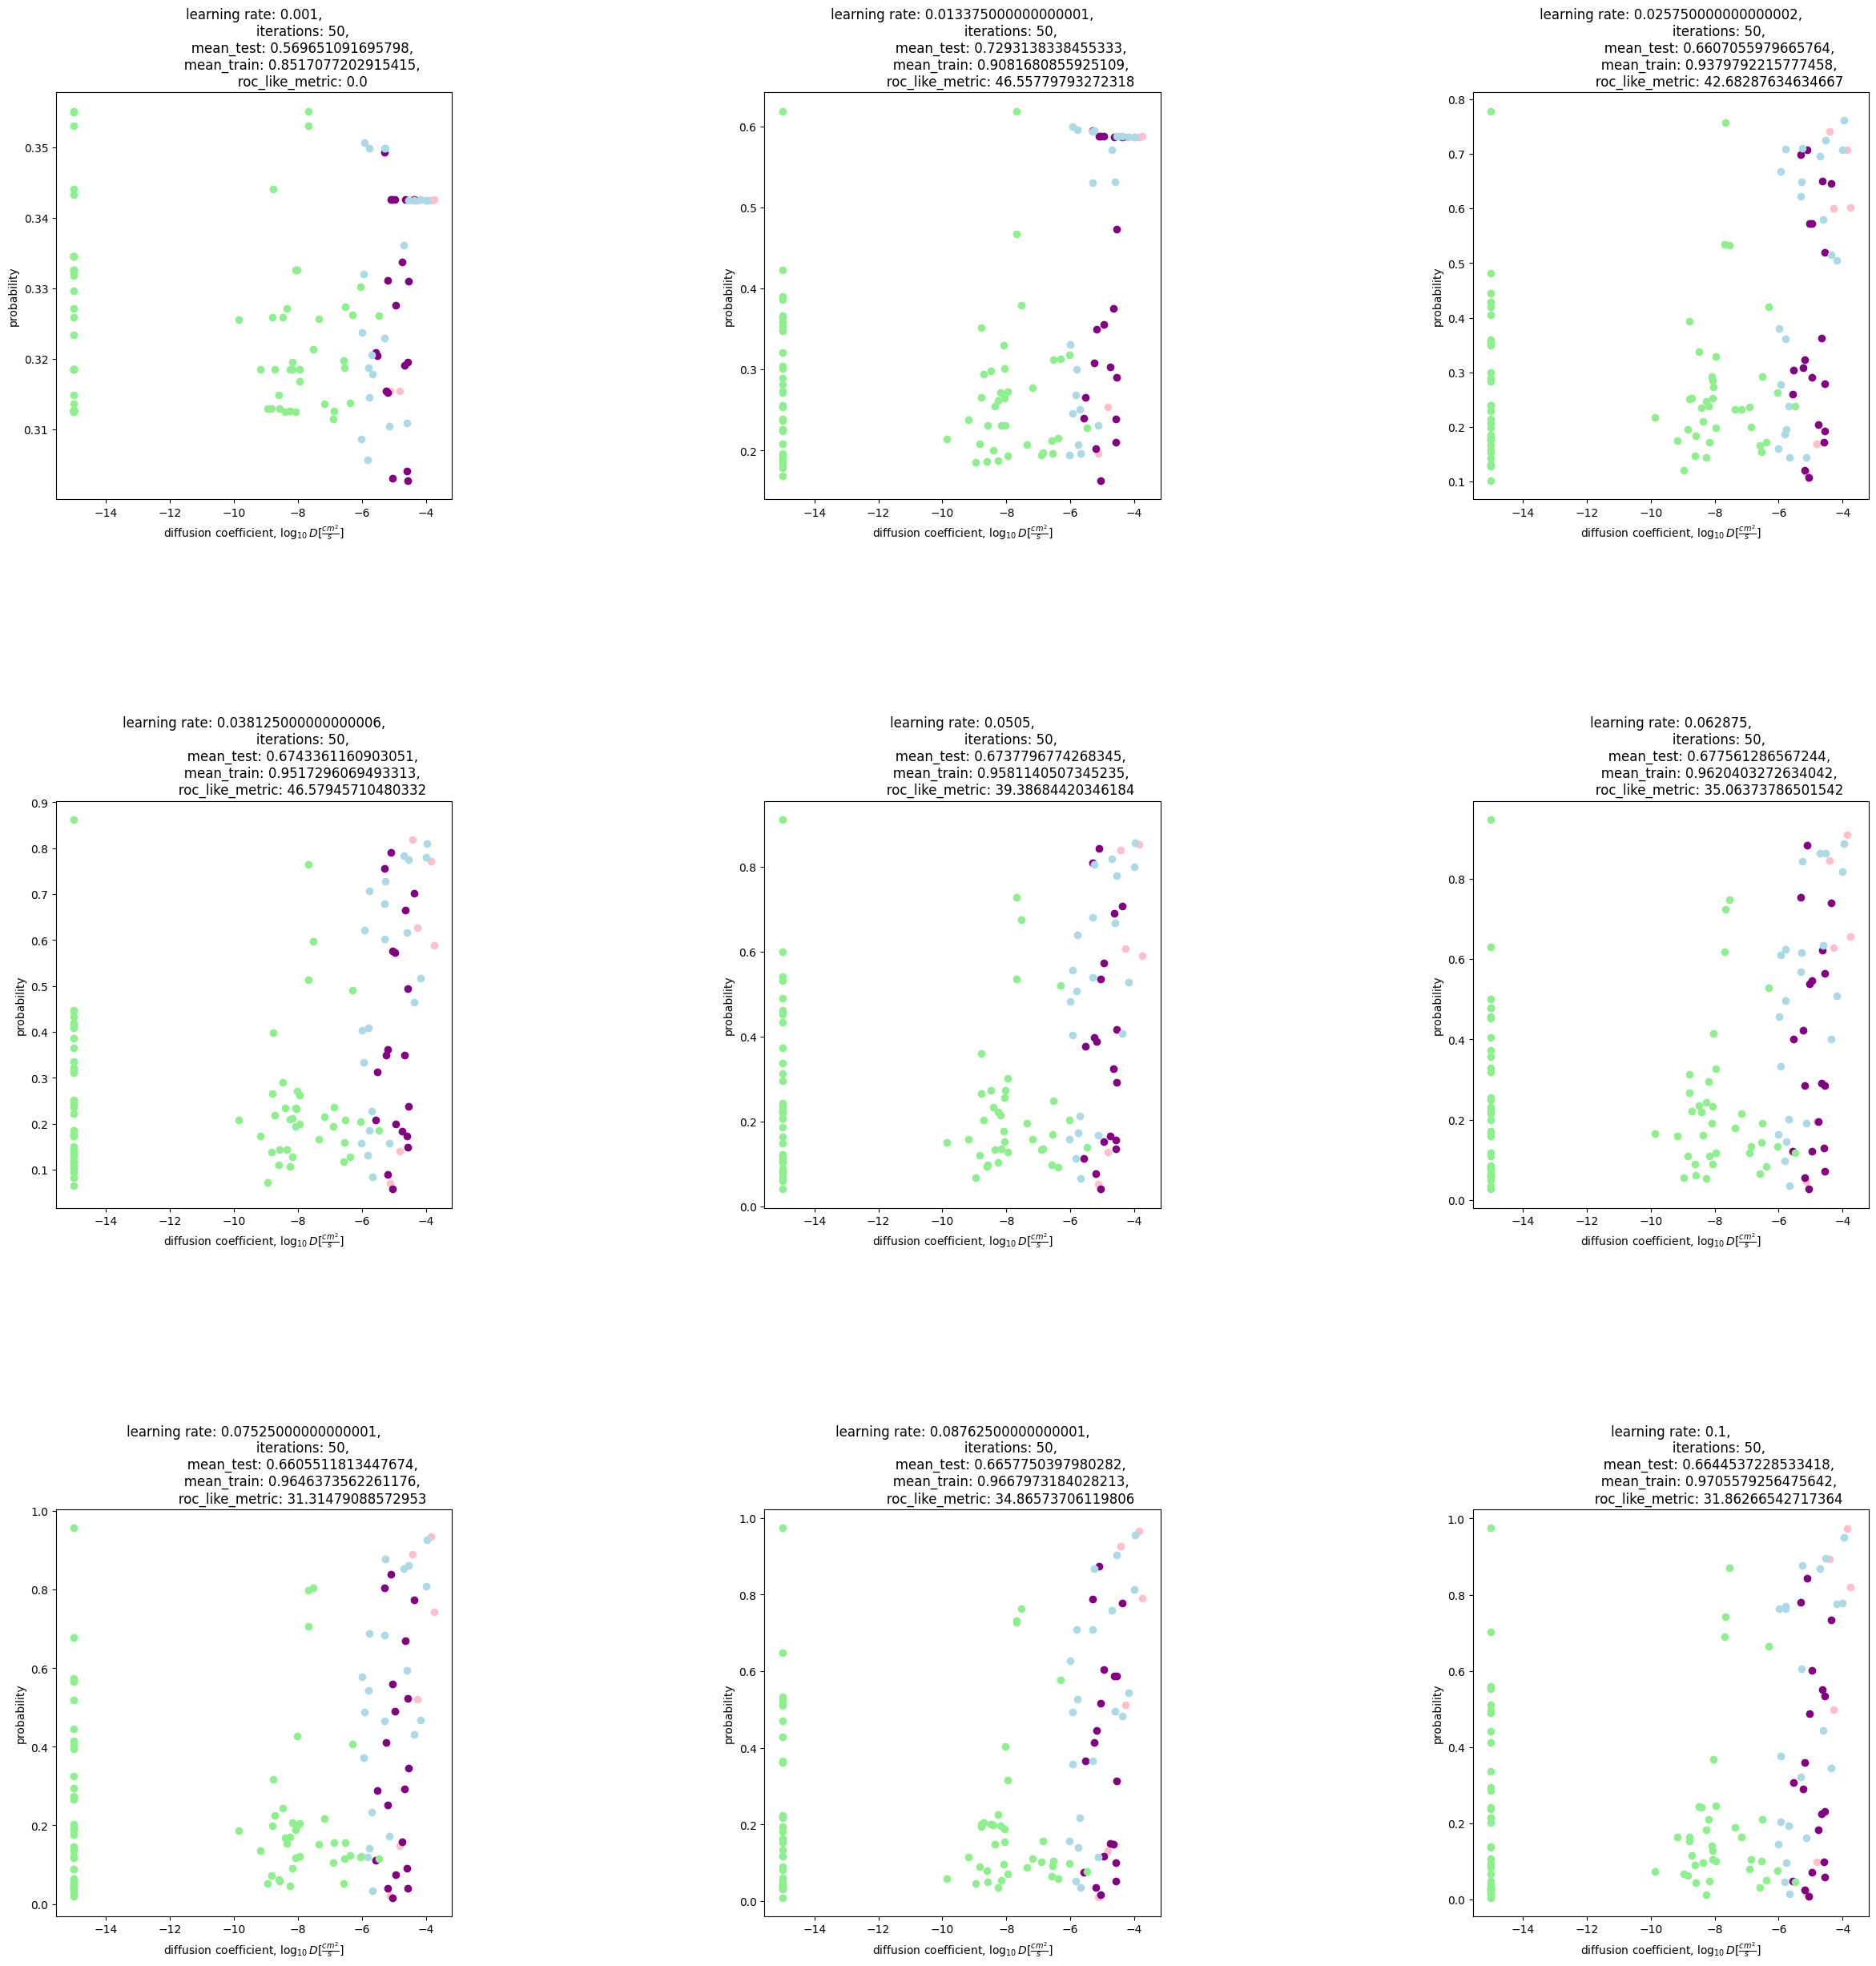

In [127]:
fig, axs = plt.subplots(3, 3, figsize=(30, 30))
fig.tight_layout(pad=25.0)


params = {
        "objective" : "binary",
        "metric" : "binary_logloss",
        "max_depth": 3,
        "n_estimators": 50,
        "verbosity" : -1,
    }

positive_weights = (1 - df_kahle_fin.apply(lambda x: math.erfc((x['sigma_S_cm'] - 1e-1) / x['sigma_S_cm_sem']) / 2, axis=1)).to_numpy()
negative_weights = (df_kahle_fin.apply(lambda x: math.erfc((x['sigma_S_cm'] - 1e-2) / x['sigma_S_cm_sem']) / 2, axis=1)).to_numpy()

for i, learning_rate in enumerate(np.linspace(0.001, 0.1, 9)):
    model_class = LGBMClassifier(**params, learning_rate = learning_rate, feature_weights = feature_weights)


    preds, model, mean_test, std_test, mean_train, std_train = train_loop(X_merged, y, positive_weights, negative_weights, model_class, threshold = 1e-2, verbose = False)

    roc_like_metrics = calculate_ROClikeComparisonMetrics(df_kahle_fin, preds)['score']['preds']

    plot_diffusion_distribution(df_kahle_fin, axs, preds, i // 3, i % 3, 
                      f'learning rate: {learning_rate},\n \
                      iterations: {50},\n \
                      mean_test: {mean_test},\n \
                      mean_train: {mean_train},\n \
                      roc_like_metric: {roc_like_metrics}')
    

100%|██████████| 116/116 [00:09<00:00, 11.98it/s]


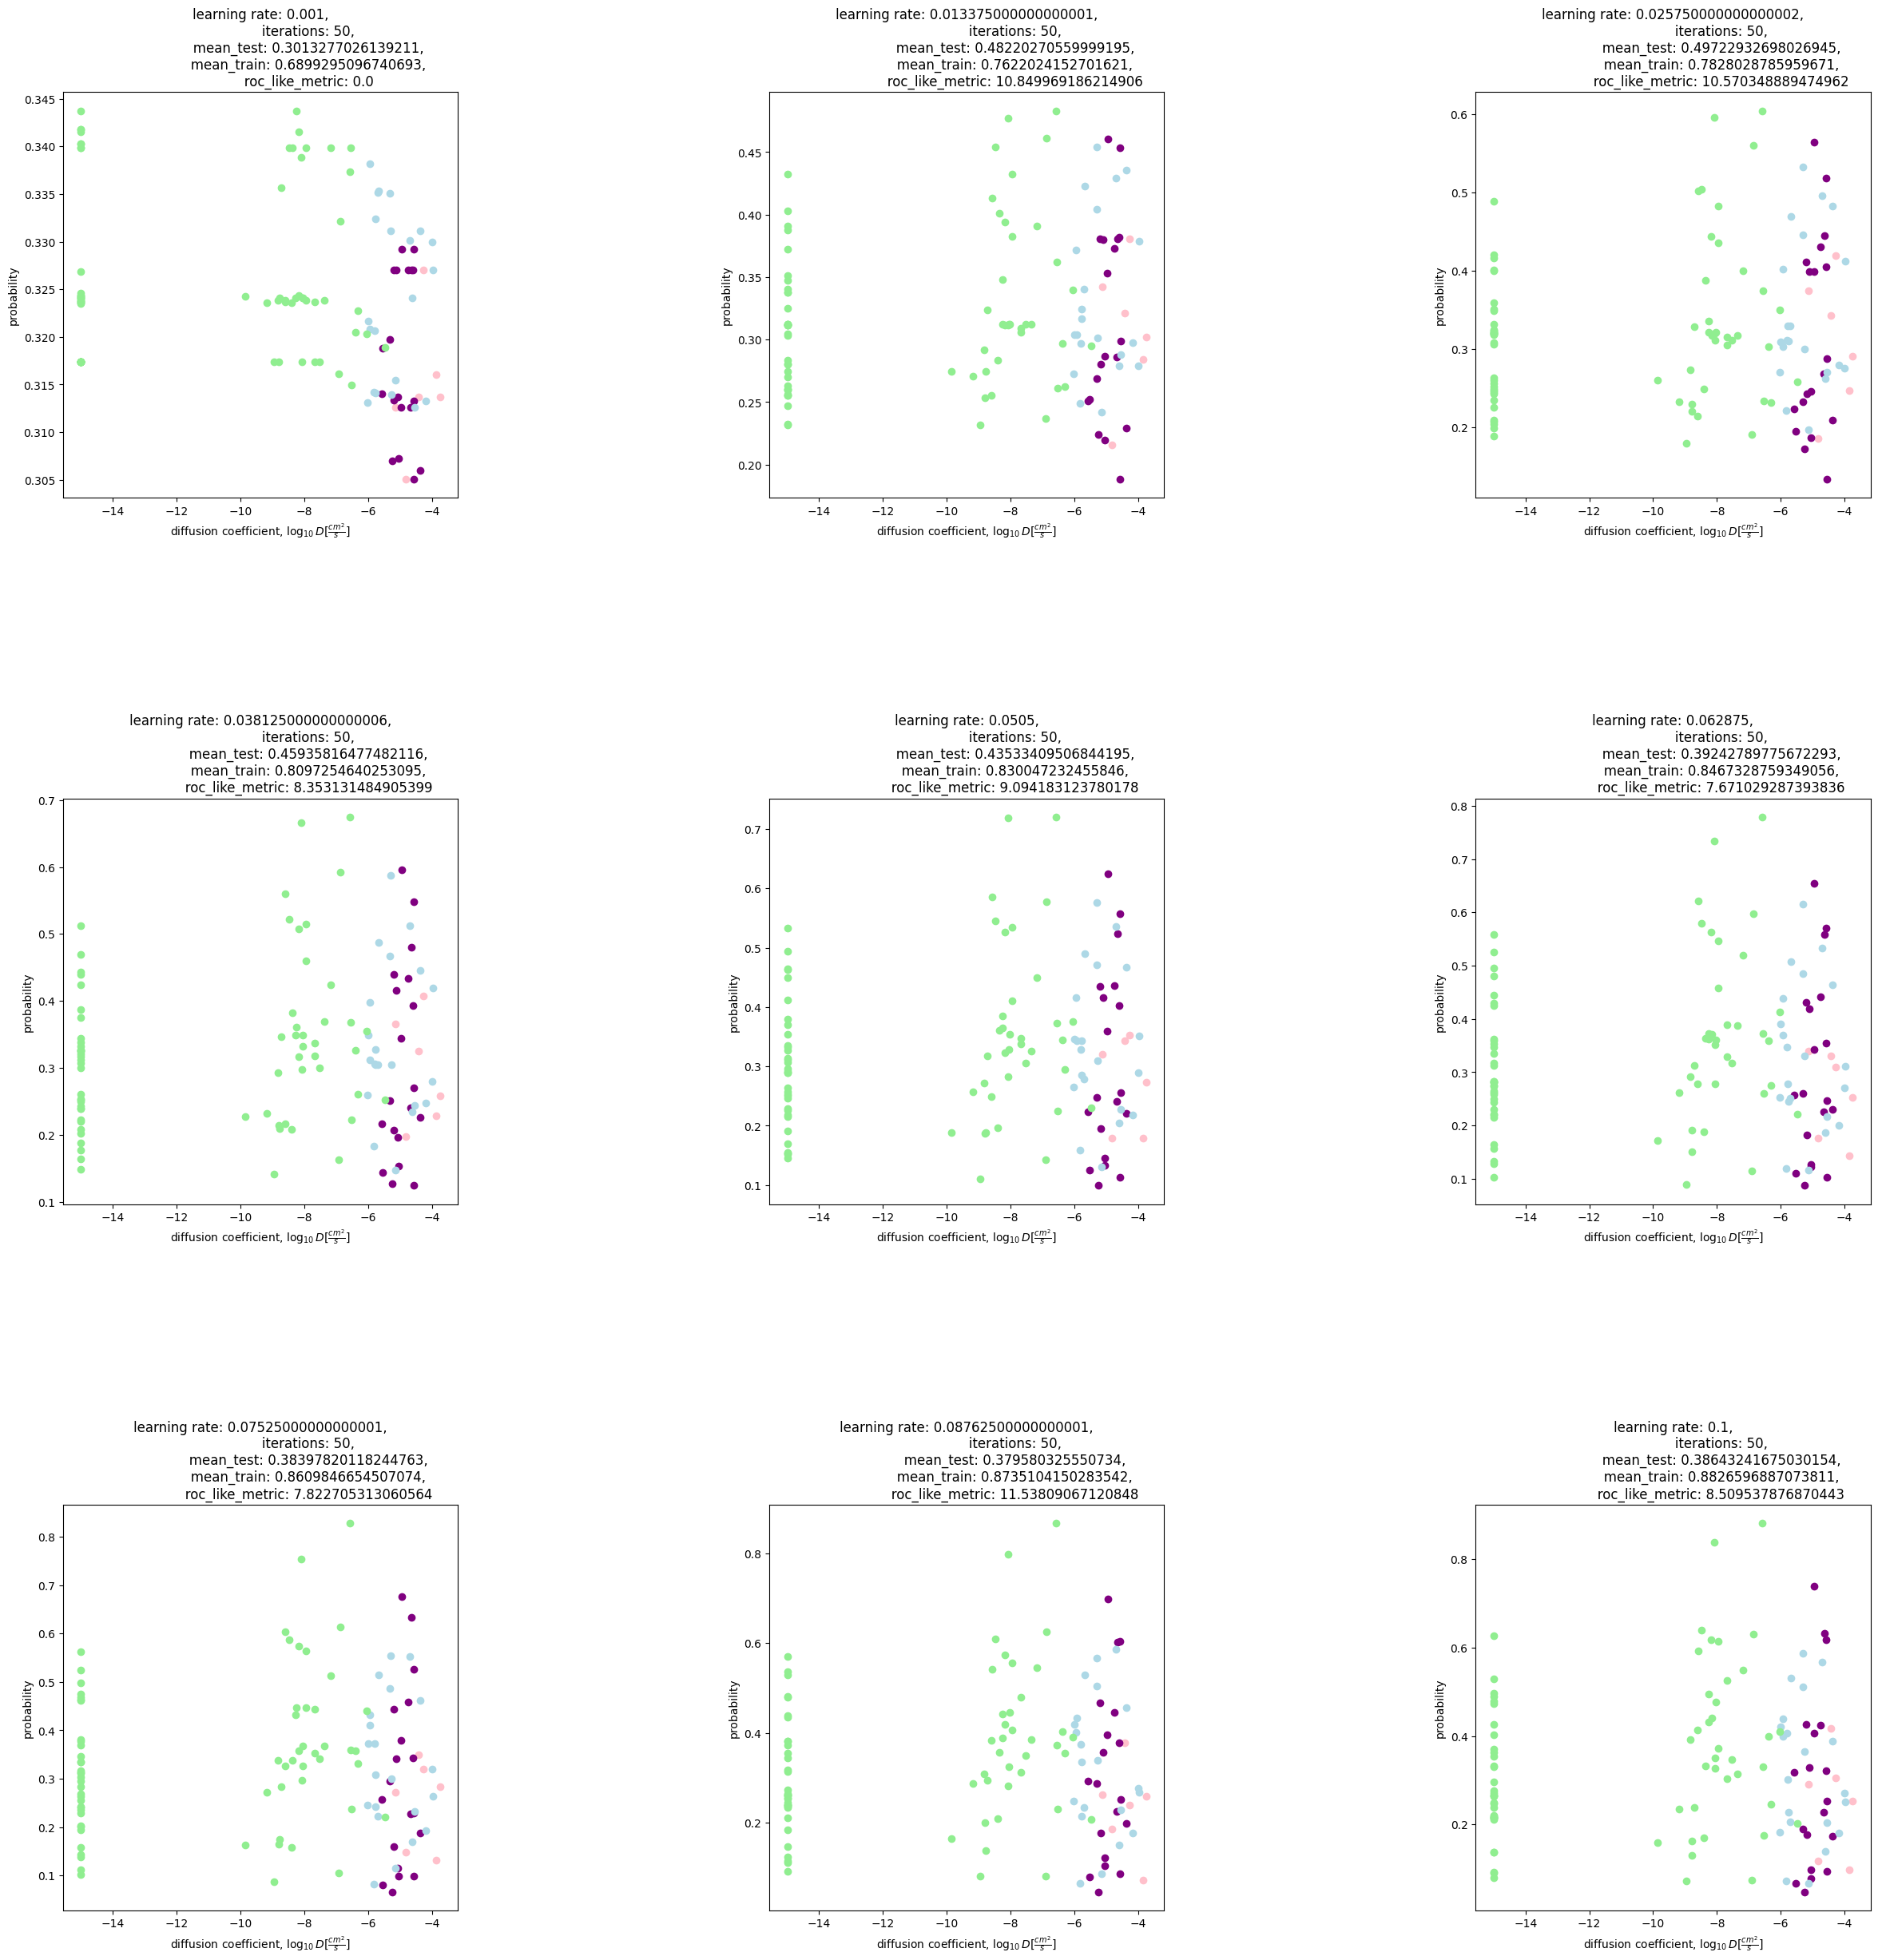

In [131]:
fig, axs = plt.subplots(3, 3, figsize=(30, 30))
fig.tight_layout(pad=25.0)


params = {
        "objective" : "binary",
        "metric" : "binary_logloss",
        "max_depth": 3,
        "n_estimators": 50,
        "verbosity" : -1,
    }

positive_weights = (1 - df_kahle_fin.apply(lambda x: math.erfc((x['sigma_S_cm'] - 1e-1) / x['sigma_S_cm_sem']) / 2, axis=1)).to_numpy()
negative_weights = (df_kahle_fin.apply(lambda x: math.erfc((x['sigma_S_cm'] - 1e-2) / x['sigma_S_cm_sem']) / 2, axis=1)).to_numpy()

for i, learning_rate in enumerate(np.linspace(0.001, 0.1, 9)):
    model_class = LGBMClassifier(**params, learning_rate = learning_rate, feature_weights = feature_weights)


    preds, model, mean_test, std_test, mean_train, std_train = train_loop(X_nn, y, positive_weights, negative_weights, model_class, threshold = 1e-2, verbose = False)

    roc_like_metrics = calculate_ROClikeComparisonMetrics(df_kahle_fin, preds)['score']['preds']

    plot_diffusion_distribution(df_kahle_fin, axs, preds, i // 3, i % 3, 
                      f'learning rate: {learning_rate},\n \
                      iterations: {50},\n \
                      mean_test: {mean_test},\n \
                      mean_train: {mean_train},\n \
                      roc_like_metric: {roc_like_metrics}')
    